In [1]:
import pandas as pd
from pandas import to_datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import __version__
import cufflinks as cf
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objects as go
cf.go_offline()
%matplotlib inline
from sklearn.metrics import confusion_matrix
import random

In [2]:
palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia','Wistia_r','YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Assignment


You have already picked out the dataset you want to work with. If you have not, you can use this dataset [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/J6BNrGi_wv8AAAAC/funny-meme.gif)


![](https://media.tenor.com/hmScgtFaBtYAAAAC/letsgooo.gif)

# Data Information

In [3]:
df = pd.read_csv('TelcoChurn.csv')

In [4]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Changing the data type of "Total Charges" from object to float

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', '1394.55'))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking for NA values

In [9]:
(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.912360
std         0.368612    24.559481       30.090047   2265.272185
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

# Plotting a bar graph for df.describe() to understand it a little bit better\
![](https://media.tenor.com/YocYXjTQe28AAAAC/iambeinggenerous-cayke.gif)

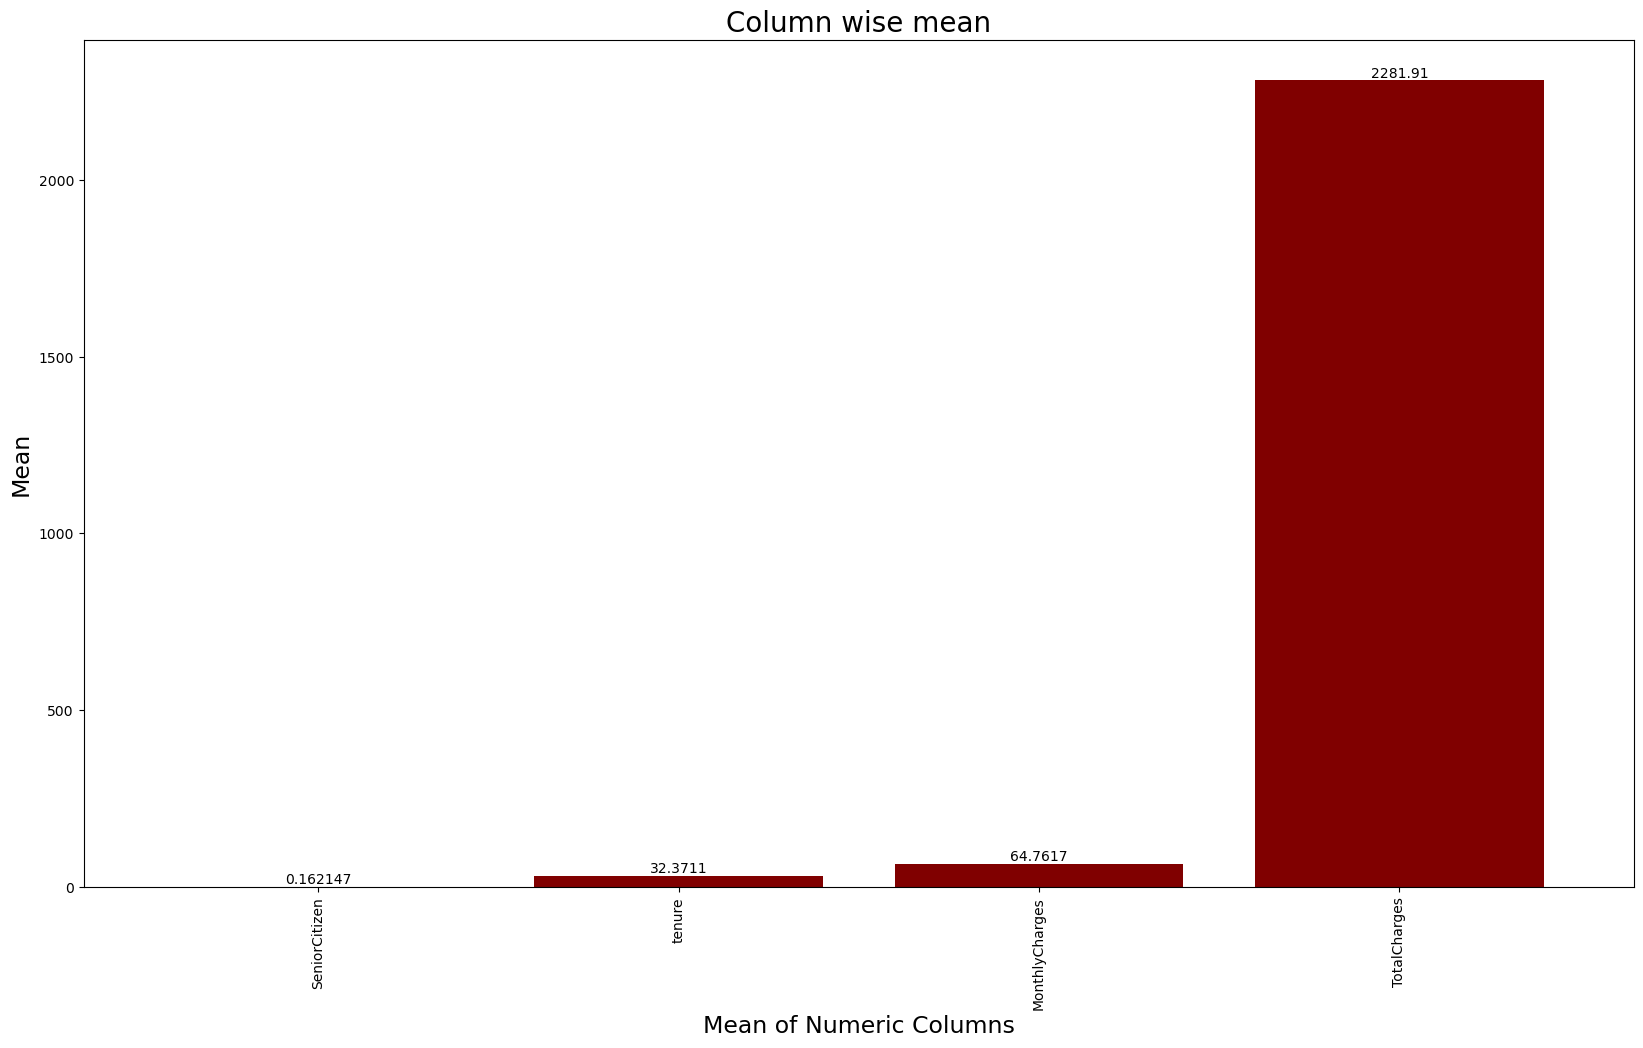

In [11]:
plt.figure(figsize = (20, 11))
ax = df.describe().loc["mean"].plot.bar(color ='maroon',width = 0.8)
ax.set_xlabel(xlabel = 'Mean of Numeric Columns', fontsize = 17)
ax.set_ylabel(ylabel = 'Mean', fontsize = 17)
ax.set_title(label = 'Column wise mean', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

#### Saving column wise mean in a panda dataframe to plot box plots for much better clarity

In [12]:
df1 = pd.DataFrame(df.describe())

##### Dropping "count" (not useful in this analysis)

In [13]:
df1.drop(index= "count", axis=1 , inplace=True)
df1.head(1)

SeniorCitizen     tenure  MonthlyCharges  TotalCharges
mean       0.162147  32.371149       64.761692    2281.91236

In [14]:
df1

SeniorCitizen     tenure  MonthlyCharges  TotalCharges
mean       0.162147  32.371149       64.761692   2281.912360
std        0.368612  24.559481       30.090047   2265.272185
min        0.000000   0.000000       18.250000     18.800000
25%        0.000000   9.000000       35.500000    402.225000
50%        0.000000  29.000000       70.350000   1394.550000
75%        0.000000  55.000000       89.850000   3786.600000
max        1.000000  72.000000      118.750000   8684.800000

In [15]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True)

##### Due to the "Total Charges" the other variable's insights were not very clear. Excluding the variables using List Comprehension

In [16]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True, keys= [x for x in df1.columns if x in ["MonthlyCharges","tenure"]])

##### Bifurcating the variables further more for better clarity

In [17]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True, keys= [x for x in df1.columns if x in ["SeniorCitizen"]])

#### Self explanatory pie plot to see the division of each variables

<Axes: ylabel='PaymentMethod'>

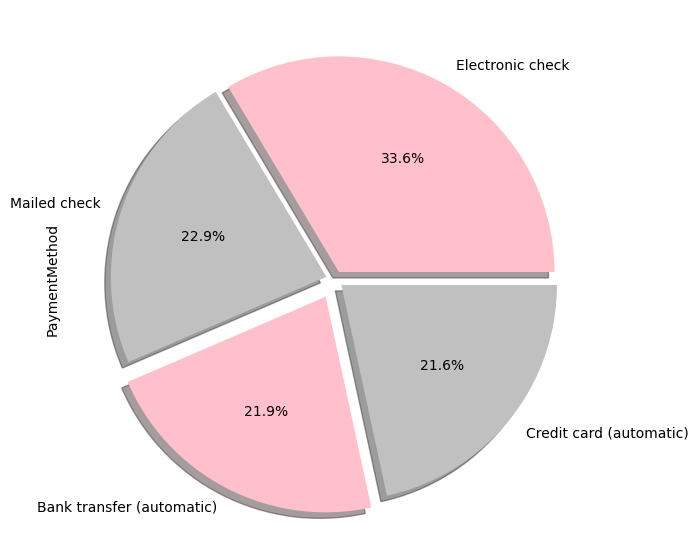

In [18]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.04, 0.04,0.09,0.04)
df['PaymentMethod'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)

<Axes: ylabel='MultipleLines'>

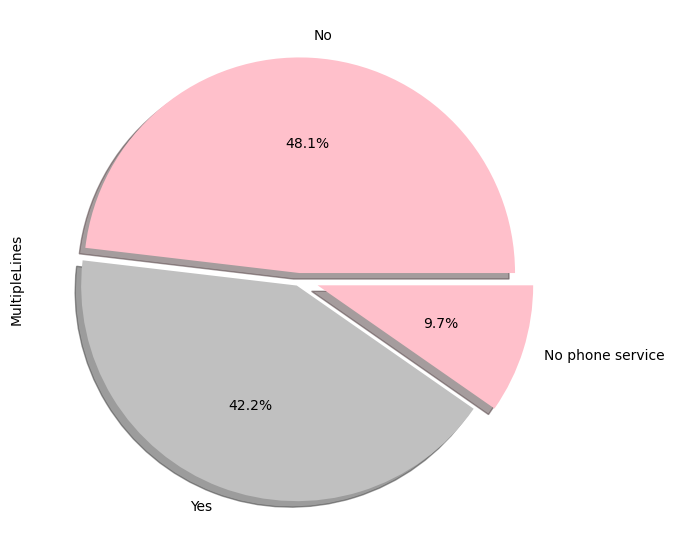

In [19]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.03, 0.03,0.09)
df['MultipleLines'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)

# Self Explanatory!!

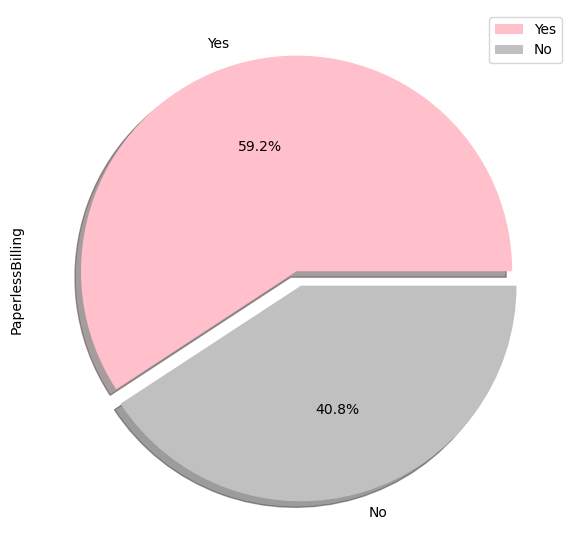

In [20]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.04, 0.03,)
df['PaperlessBilling'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

# Self Explanatory!!

C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\214742813.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



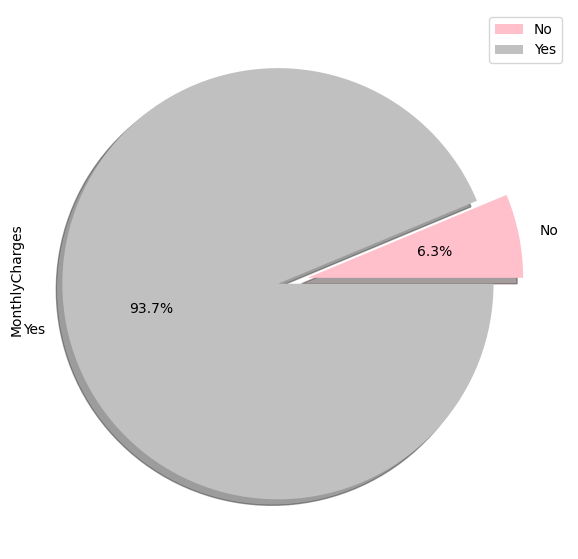

In [21]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.04, 0.1)
df.groupby(by = 'PhoneService').sum()['MonthlyCharges'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

#####
- People who have enrolled in the phone service have a significantly higher proportion of the amount that is payed monthly.

- People who did not enroll in the phone service has lower proportion of the amount that is payed monthly.

C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\768954267.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



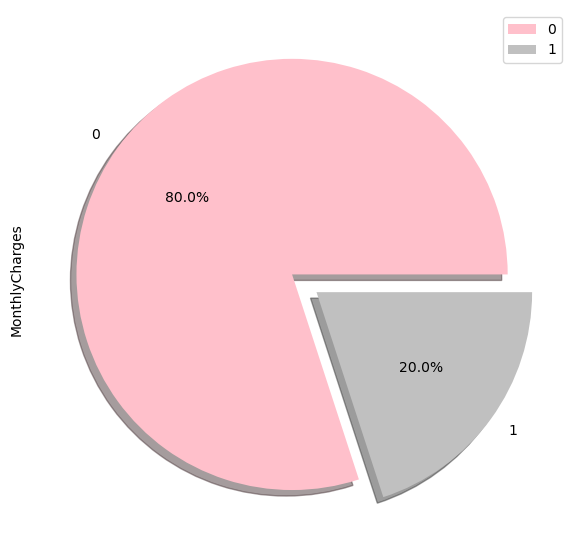

In [22]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.04, 0.1)
df.groupby(by = 'SeniorCitizen').sum()['MonthlyCharges'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

- Based on the plots, it could be seen that senior citizens pay less amount compared to the non-seniors as shown in the above plot respectively.

- We have taken the total sum of the monthly charges for senior citizens by grouping them based on their classes as shown in the pie plot above.

C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\2364128461.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



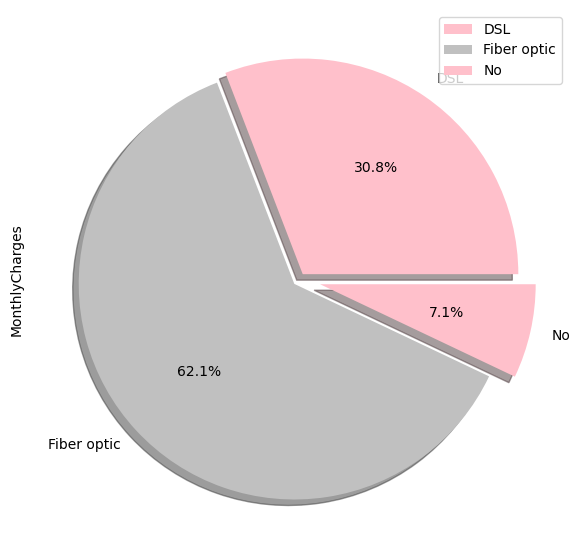

In [23]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.03, 0.03,0.1)
df.groupby(by = 'InternetService').sum()['MonthlyCharges'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

- The total charges were significantly higher for the Fiber optic customers compared to the other options as indicated in the plots shown above.
- There are other factors as well that would influence the monthly charges which in turn would influence whether a customer would churn from the service.

![](https://media.tenor.com/ZmhjypOUw2AAAAAC/visualize-floating-head.gif)

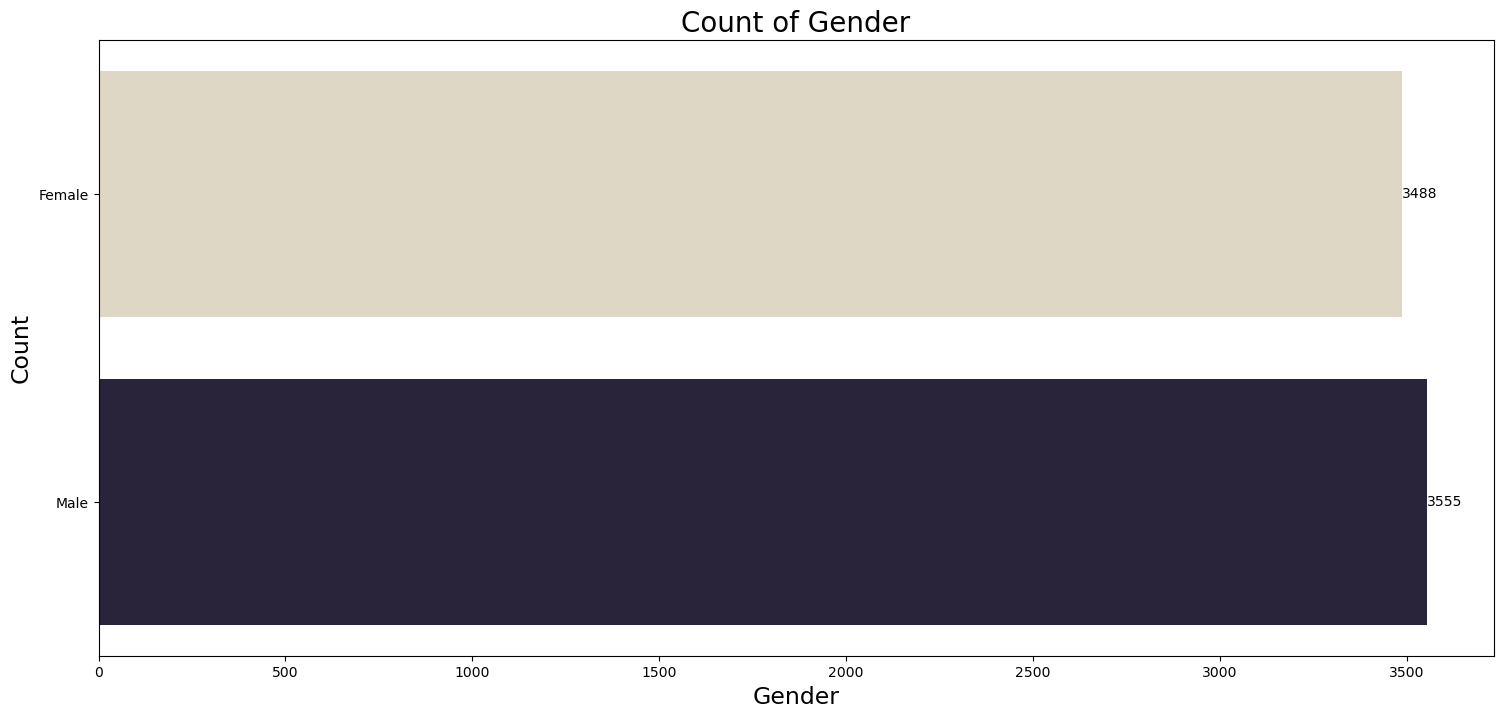

In [24]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(y ='gender', data = df, palette='ch:s=-.2,r=.6')
ax.set_xlabel(xlabel = 'Gender', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of Gender', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- As we can see, this is a very balanced dataset with both the gender count being almost the same

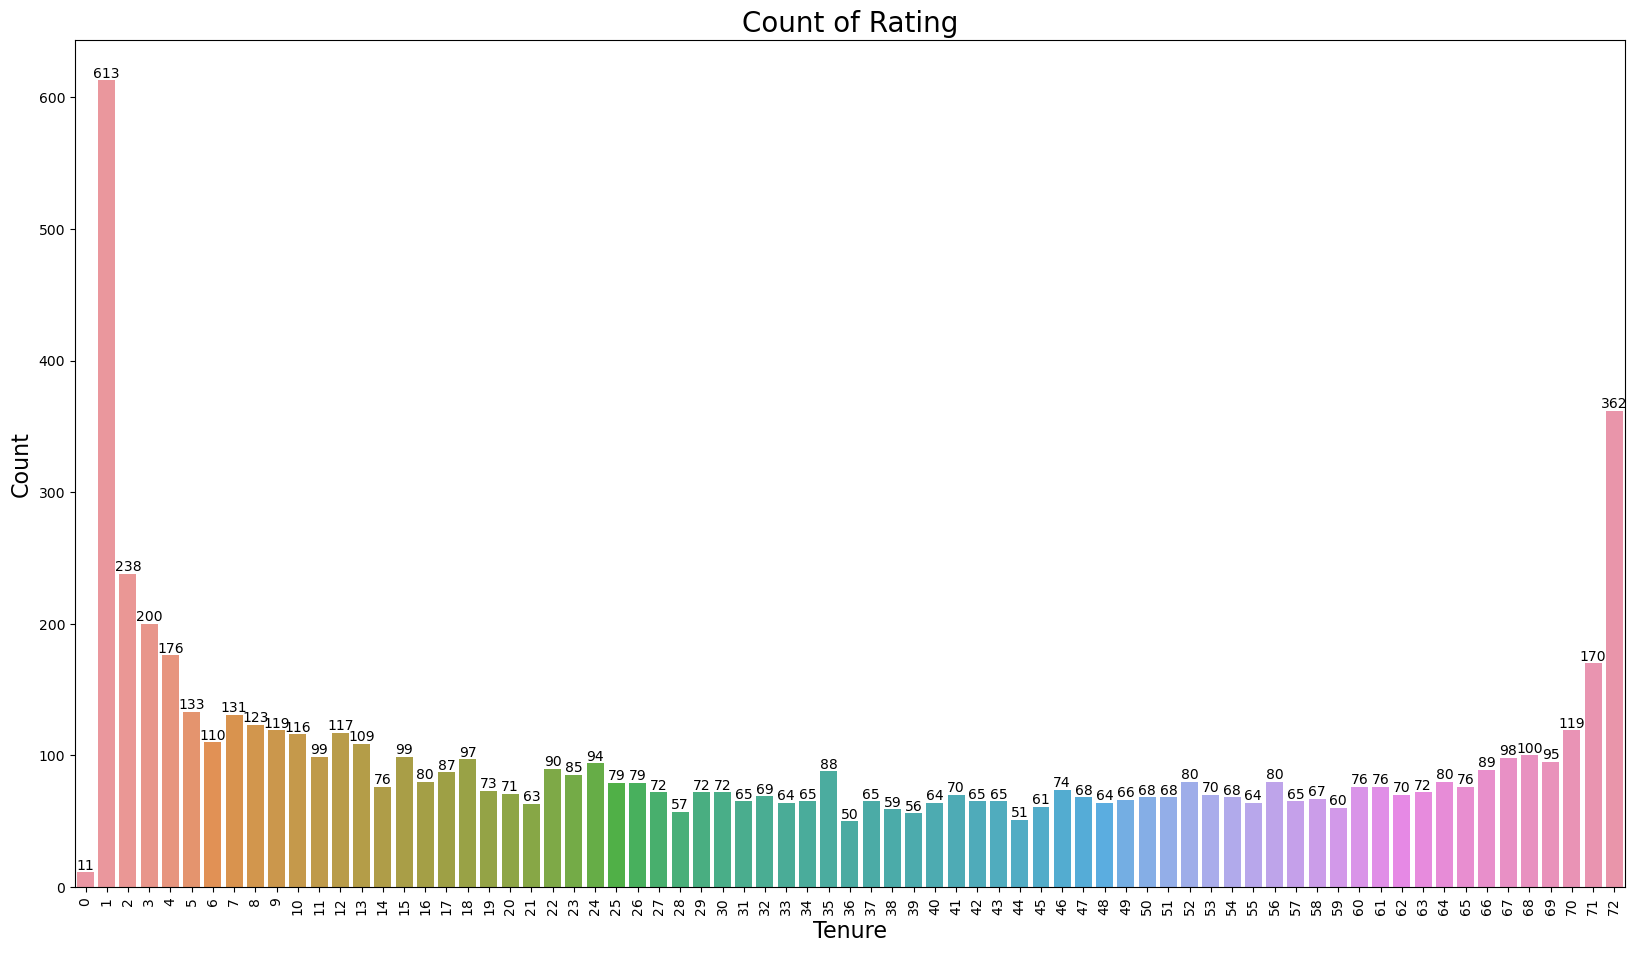

In [25]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='tenure', data = df)
ax.set_xlabel(xlabel = 'Tenure', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Rating', fontsize = 20)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)

- From the above plot we can clearly see that the most common tenure is 1 and the second being the complete opposite being 72, which is quiet strange 

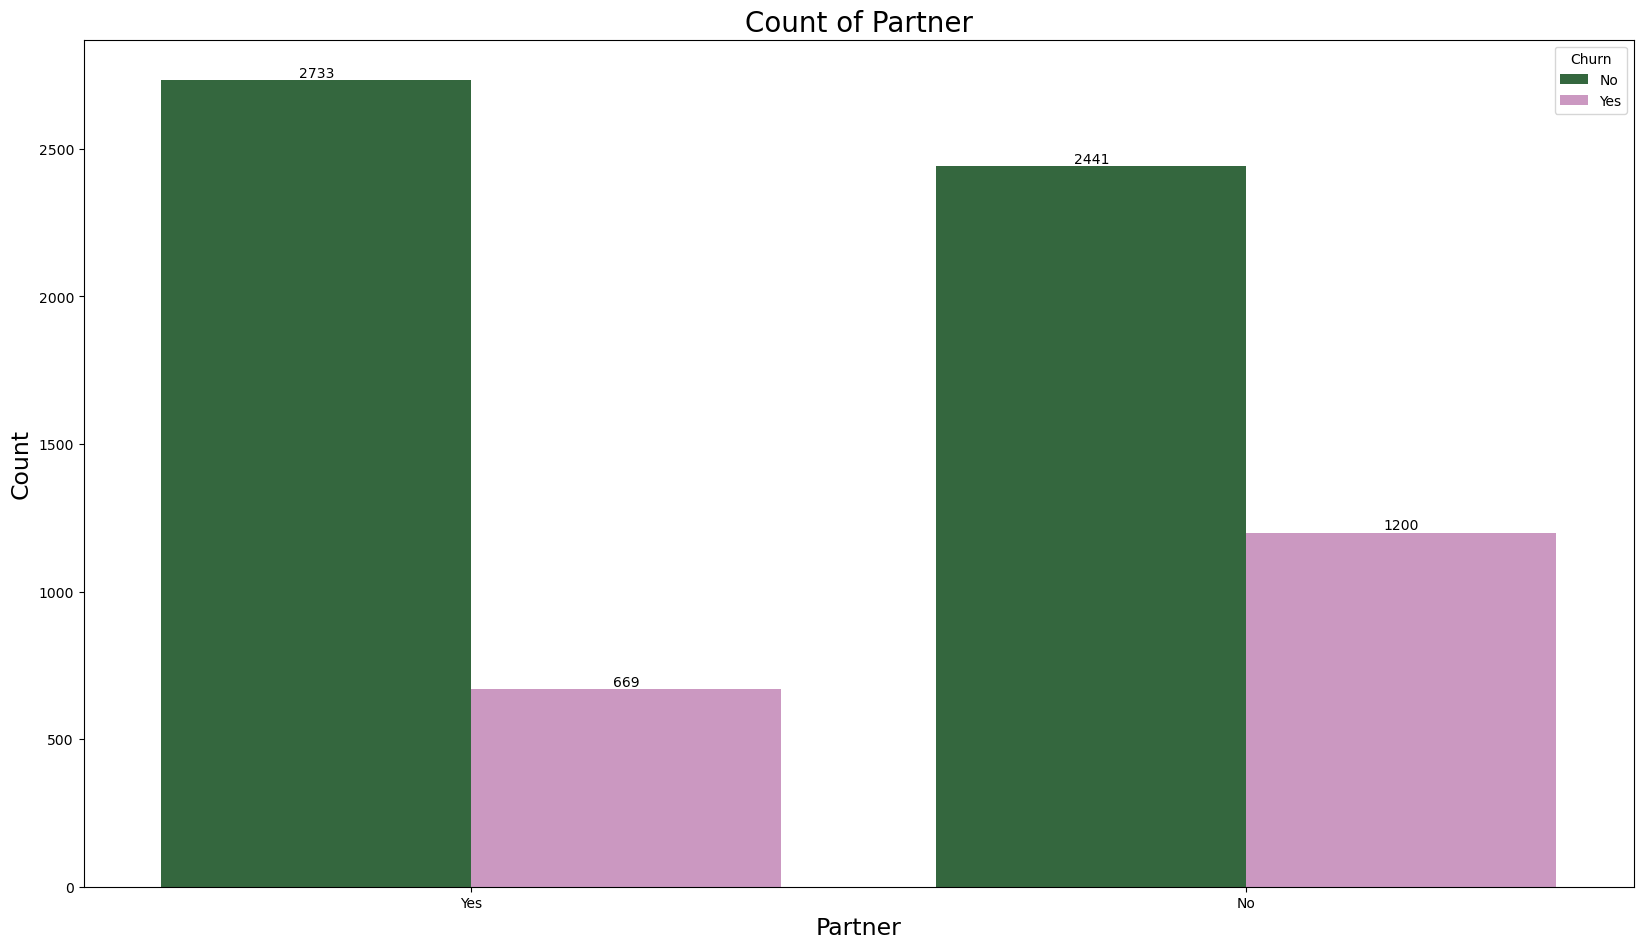

In [26]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='Partner', data = df,hue="Churn", palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Partner', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of Partner', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- There are more number of people who do not have partners compared to the ones who have partners.



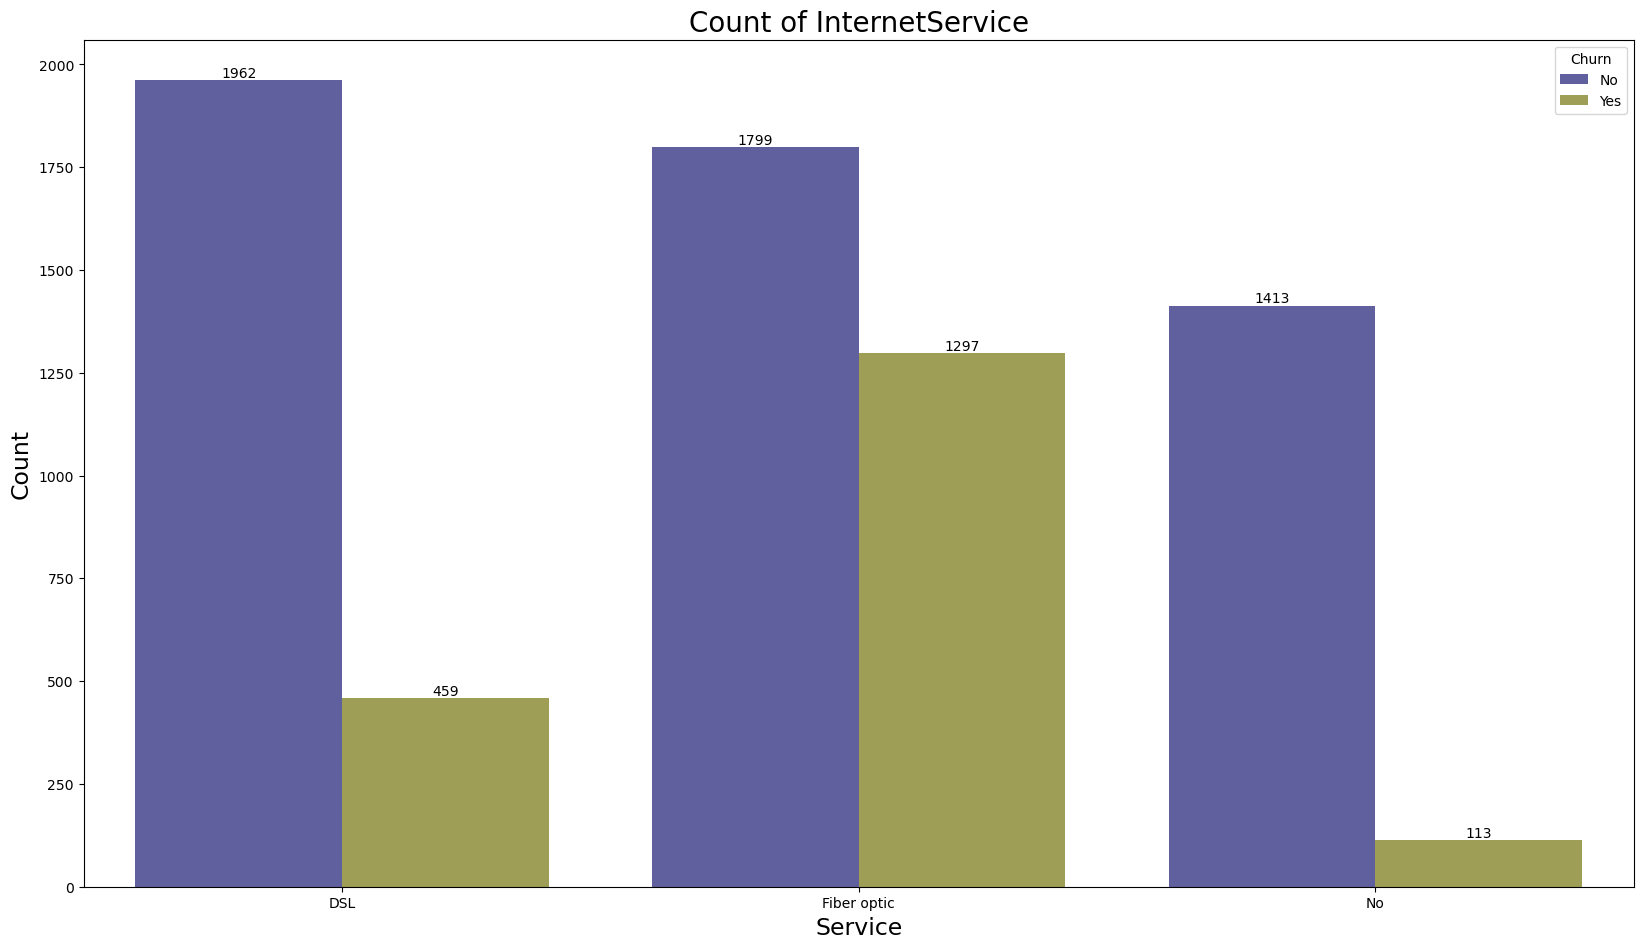

In [27]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='InternetService',hue="Churn", data = df, palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Service', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of InternetService', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- It could be seen that most of the Telco services are Fiber Optic service as this option is becoming common among customers.
- The data does a good job of reflecting the latest trends as most people opt fiber optic services compared to DSL services.

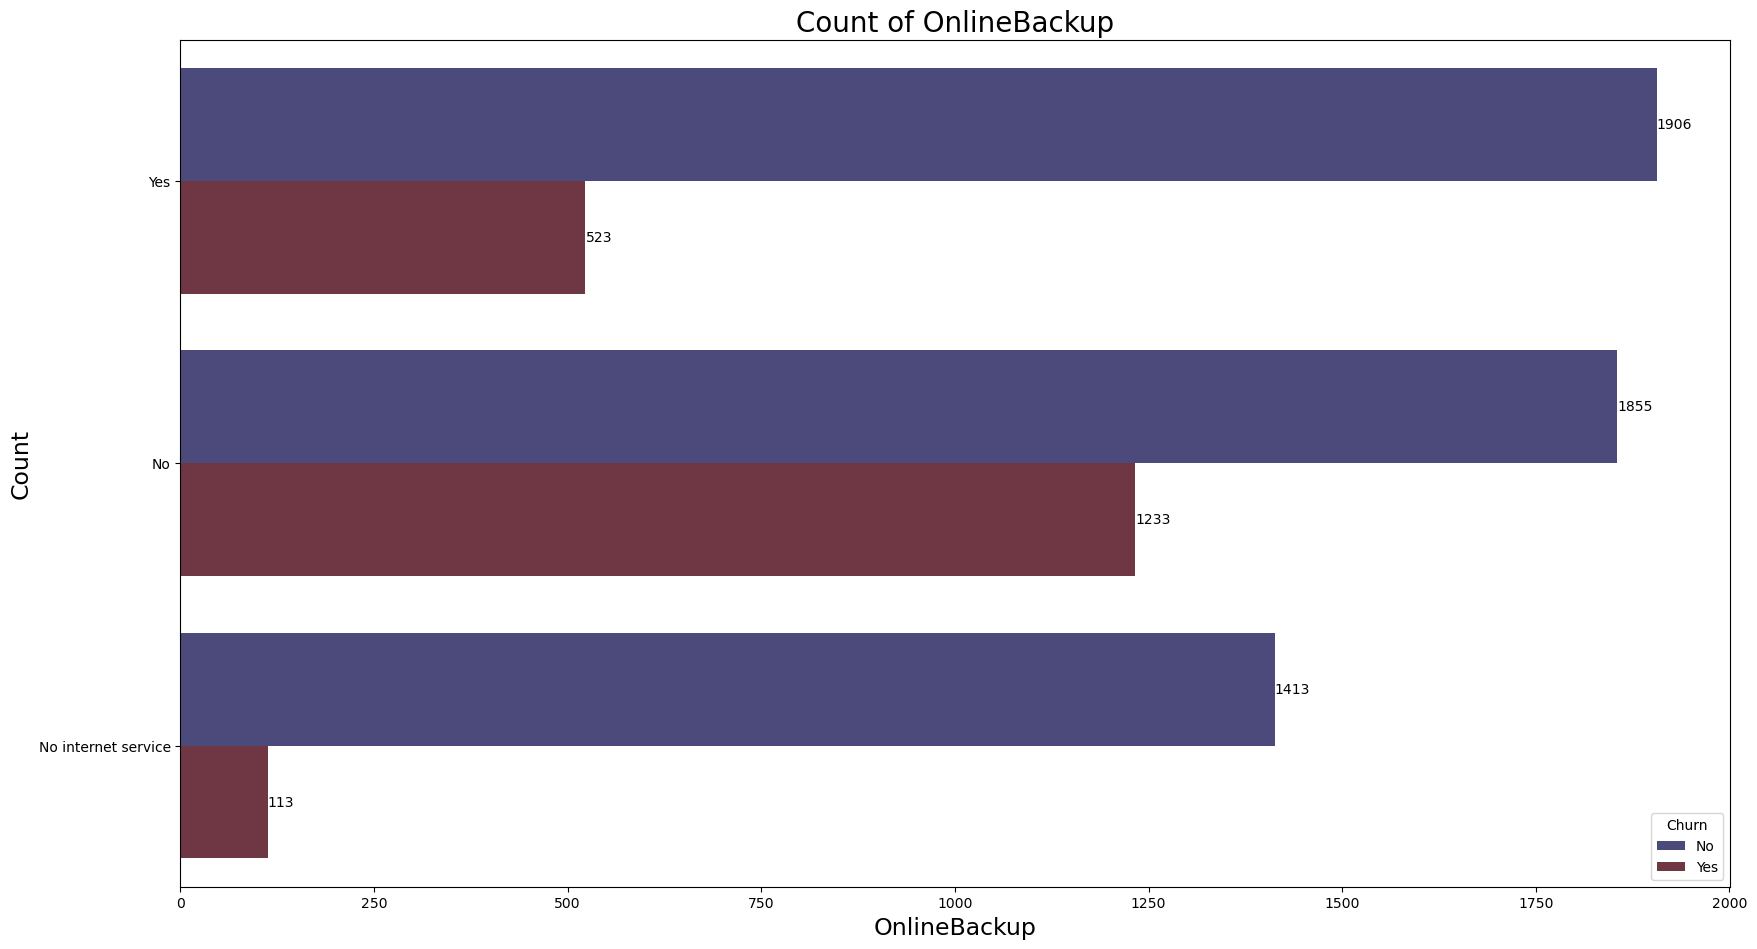

In [28]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(y ='OnlineBackup',hue="Churn", data = df, palette='icefire')
ax.set_xlabel(xlabel = 'OnlineBackup', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of OnlineBackup', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- Most people in our data do not prefer Online Backup Services(If we don't bifurcate them by churn) as clearly shown in the above plot.
- There are quite a number of people who do not opt the internet service as well.
- Therefore, we should also consider whether a person has an internet service or not before determining whether they would prefer online backup.

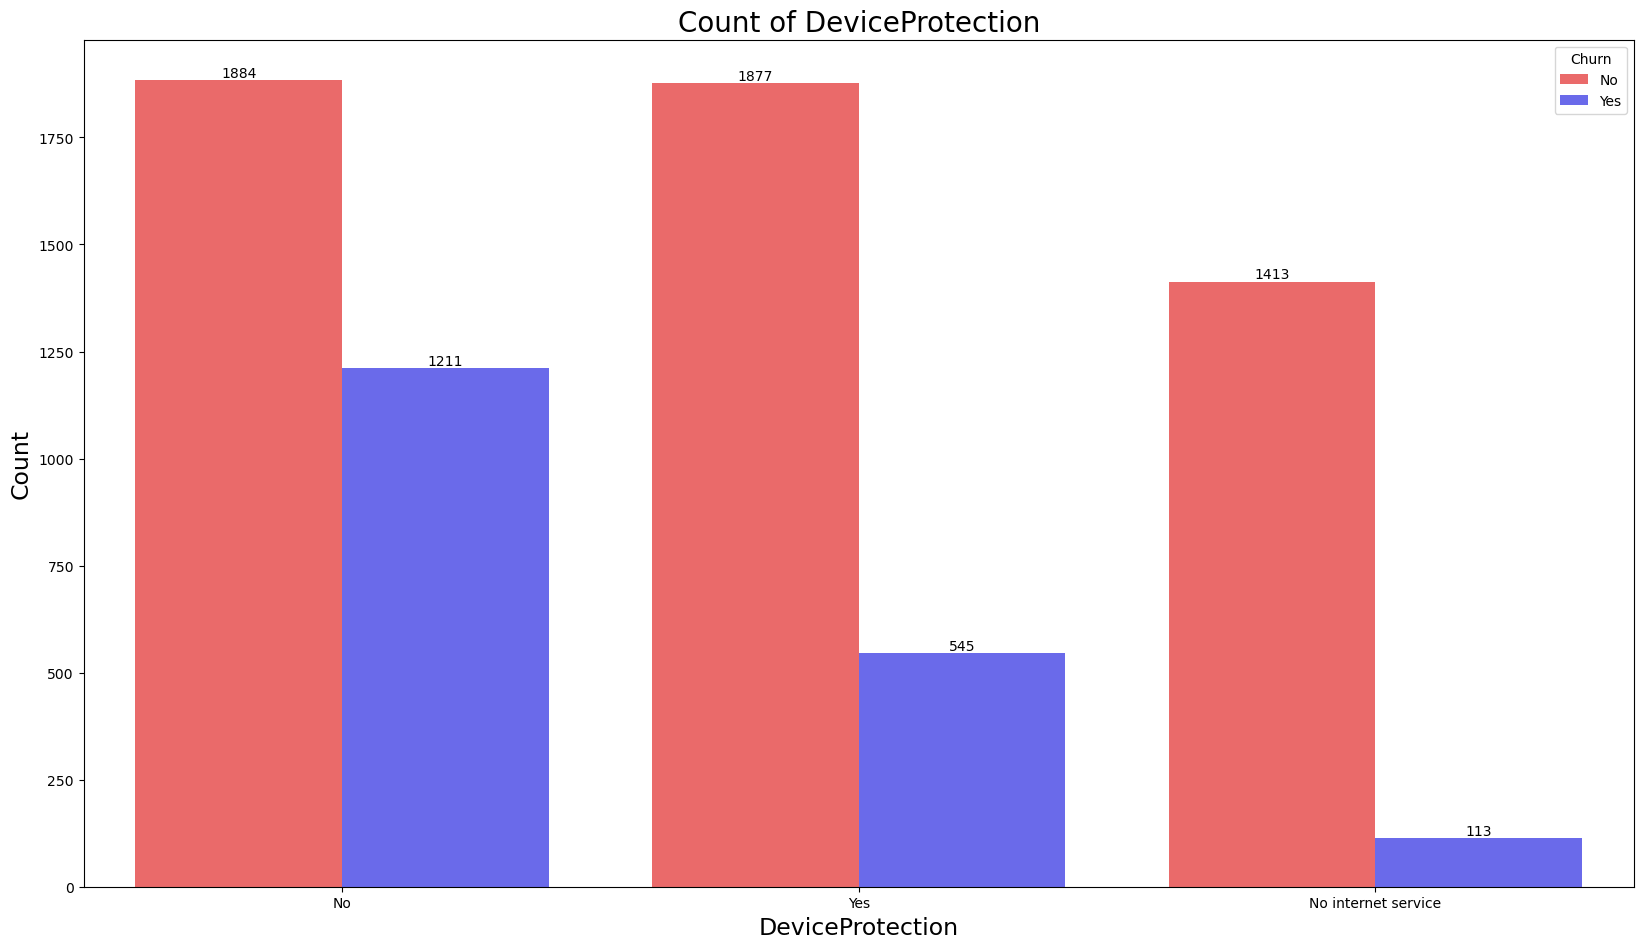

In [29]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='DeviceProtection', hue="Churn", data = df, palette=random.choice(palette_values))
ax.set_xlabel(xlabel = 'DeviceProtection', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of DeviceProtection', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- As clearly seen in the above plot Device protection also meets the same fate as Online Backup as most of the people have not chosen Device Protection

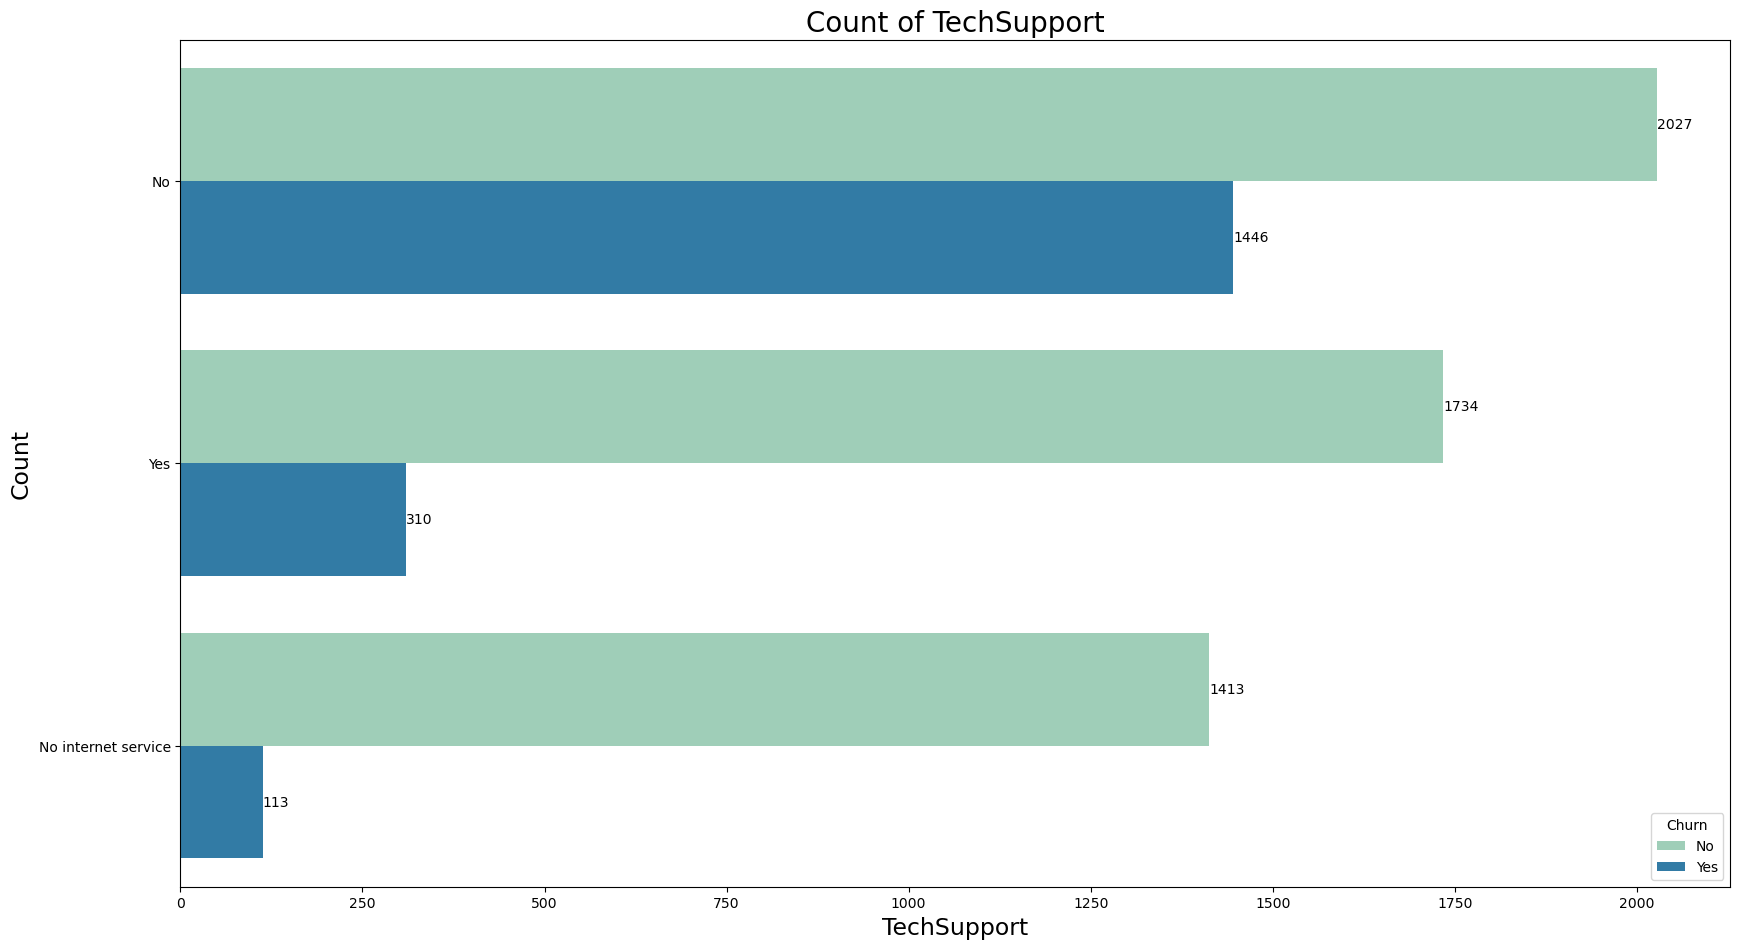

In [30]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(y ='TechSupport', hue="Churn", data = df, palette=random.choice(palette_values))
ax.set_xlabel(xlabel = 'TechSupport', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of TechSupport', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

![](https://media.tenor.com/wMMdii3-zXYAAAAd/its-not-bad-its-not-good-its-somewhere-in-the-middle-somewhere-in-the-middle.gif)

# This can be seen as a good thing as well as a bad thing :) :(
## As most of the people didn't used the tech support can have only two reasons
 - One being that the customer is happy with the customer and doesn't require the tech support 
 - other being that the churn is also increasing as the people who left the company's services didn't go to Tech support

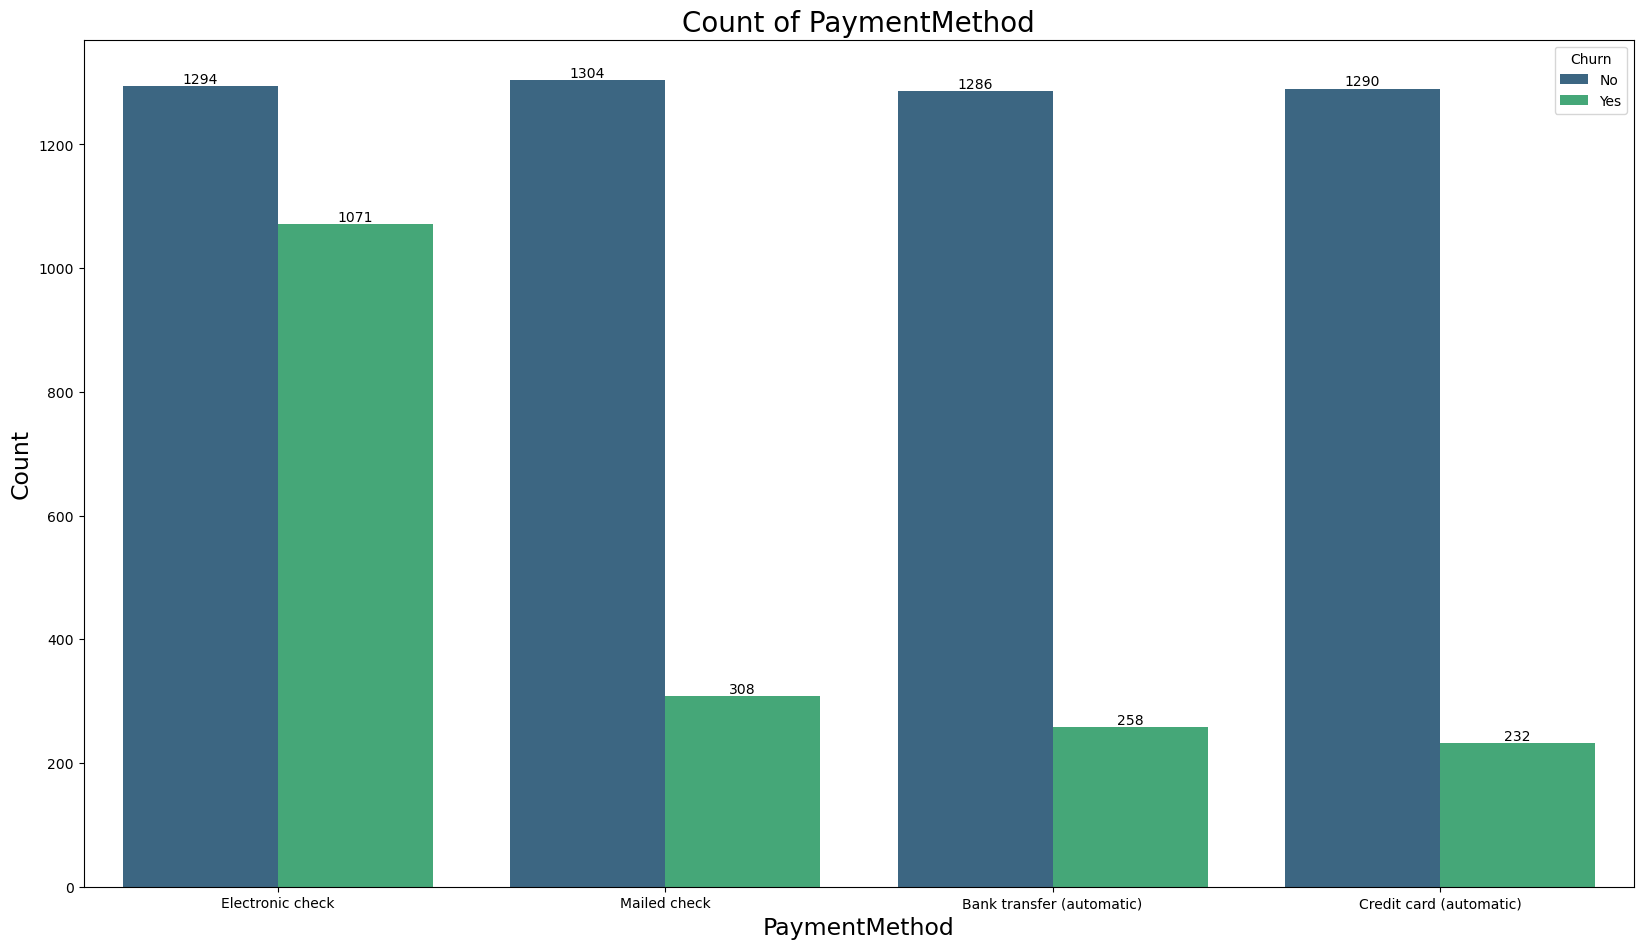

In [31]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='PaymentMethod',hue="Churn", data = df, palette='viridis')
ax.set_xlabel(xlabel = 'PaymentMethod', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of PaymentMethod', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- A large portion of users from Telco prefer Electronic Check compared to other options.
- There are other options which are popular among the customers as well such as Mailed check, Bank transfer (automatic) and Credit card (automatic).

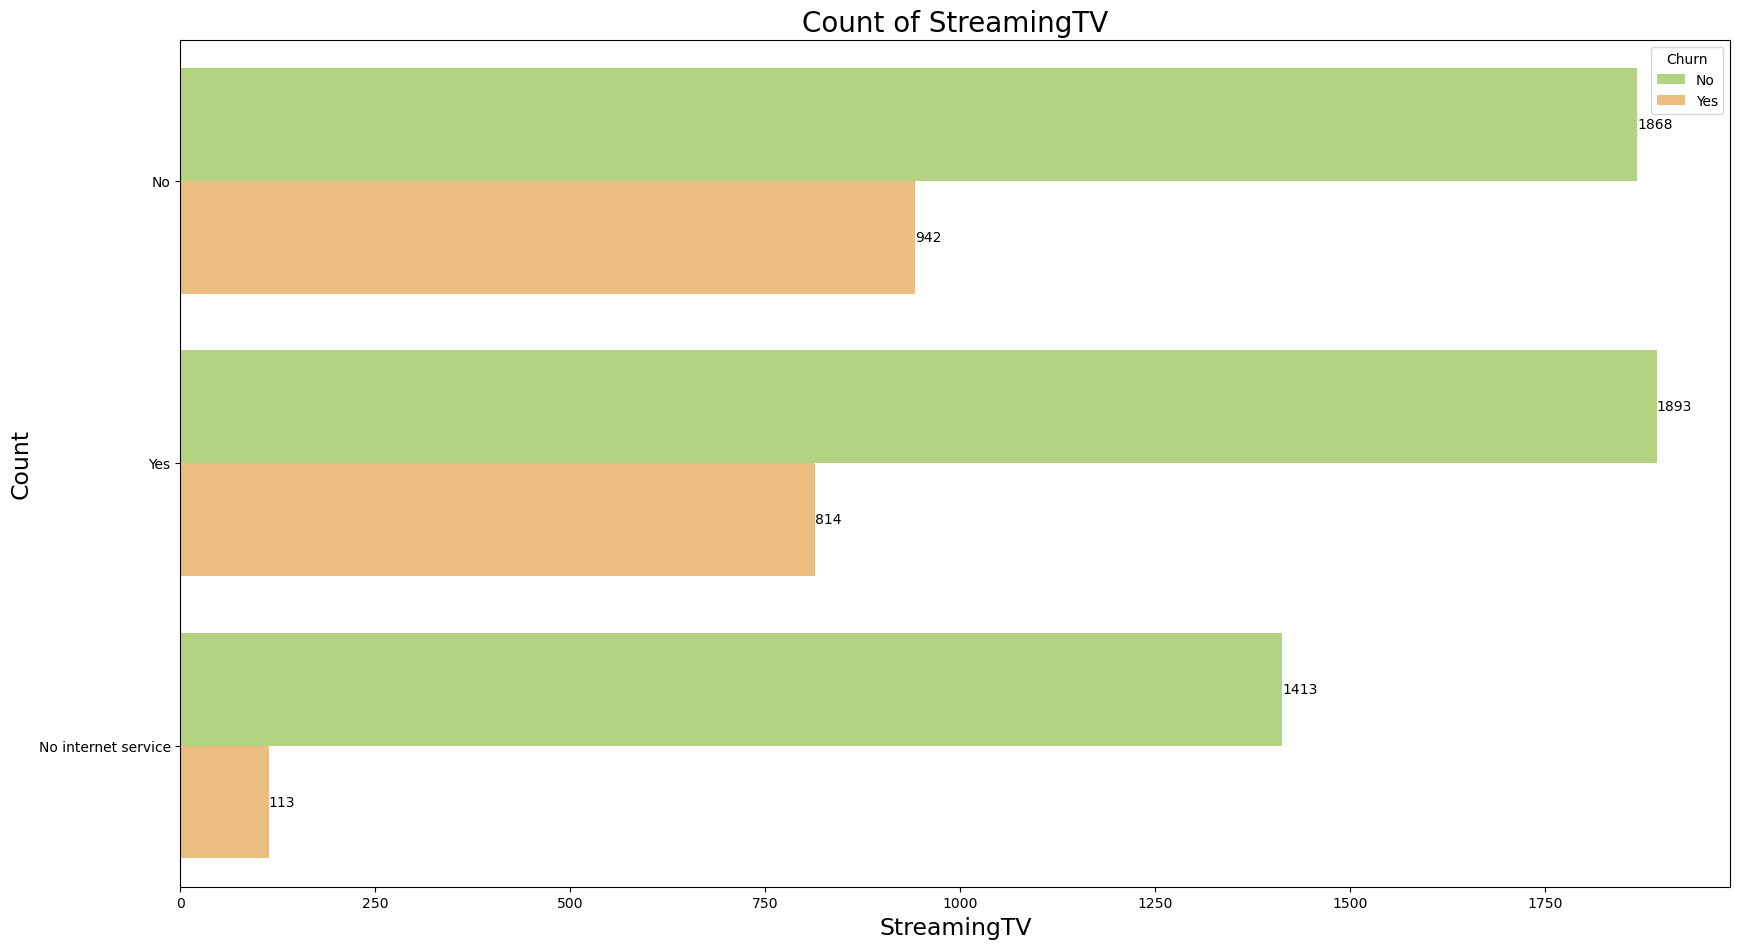

In [32]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(y ='StreamingTV',hue="Churn", data = df, palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'StreamingTV', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of StreamingTV', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- The number of people Streaming and not Streaming the tv is almost the same.
- Though we can see that the people who churned didn't use the service are more that the people who did.
- This means that the company should take measures to increase the number of people streamingtv to reduce the churn rate.
![](https://media.tenor.com/MLoj8SONttcAAAAd/sushichaeng-lazy.gif)

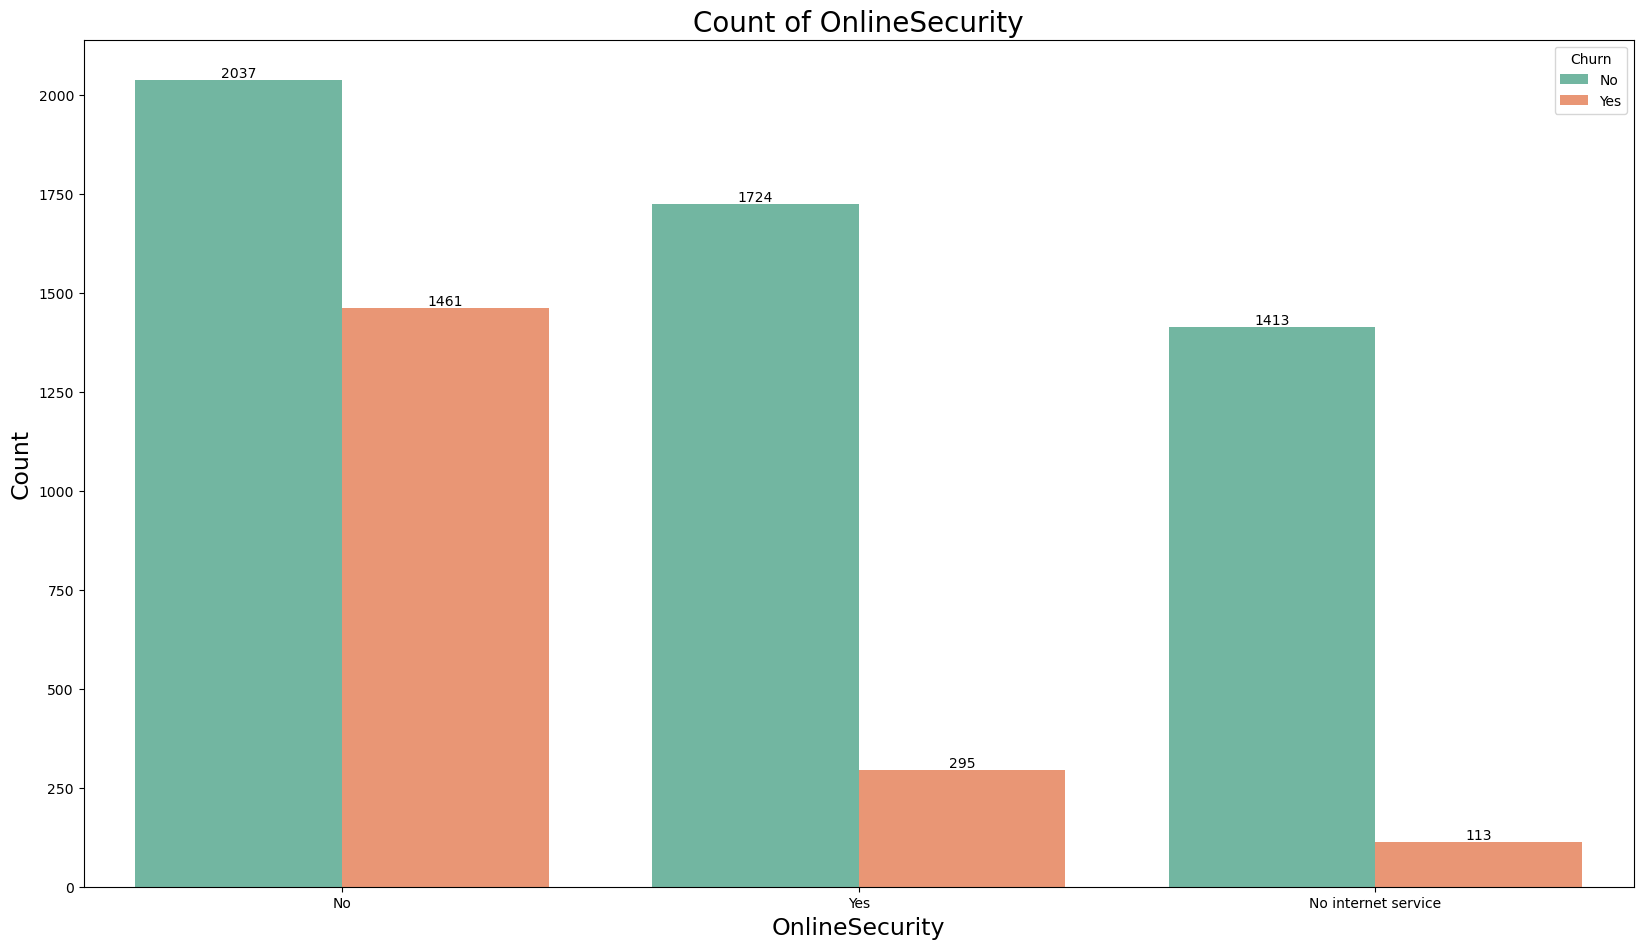

In [33]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='OnlineSecurity', hue="Churn", data = df, palette=random.choice(palette_values))
ax.set_xlabel(xlabel = 'OnlineSecurity', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of OnlineSecurity', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- In the above graph also we can see that the number of people who left didn't have the OnlineSecurity

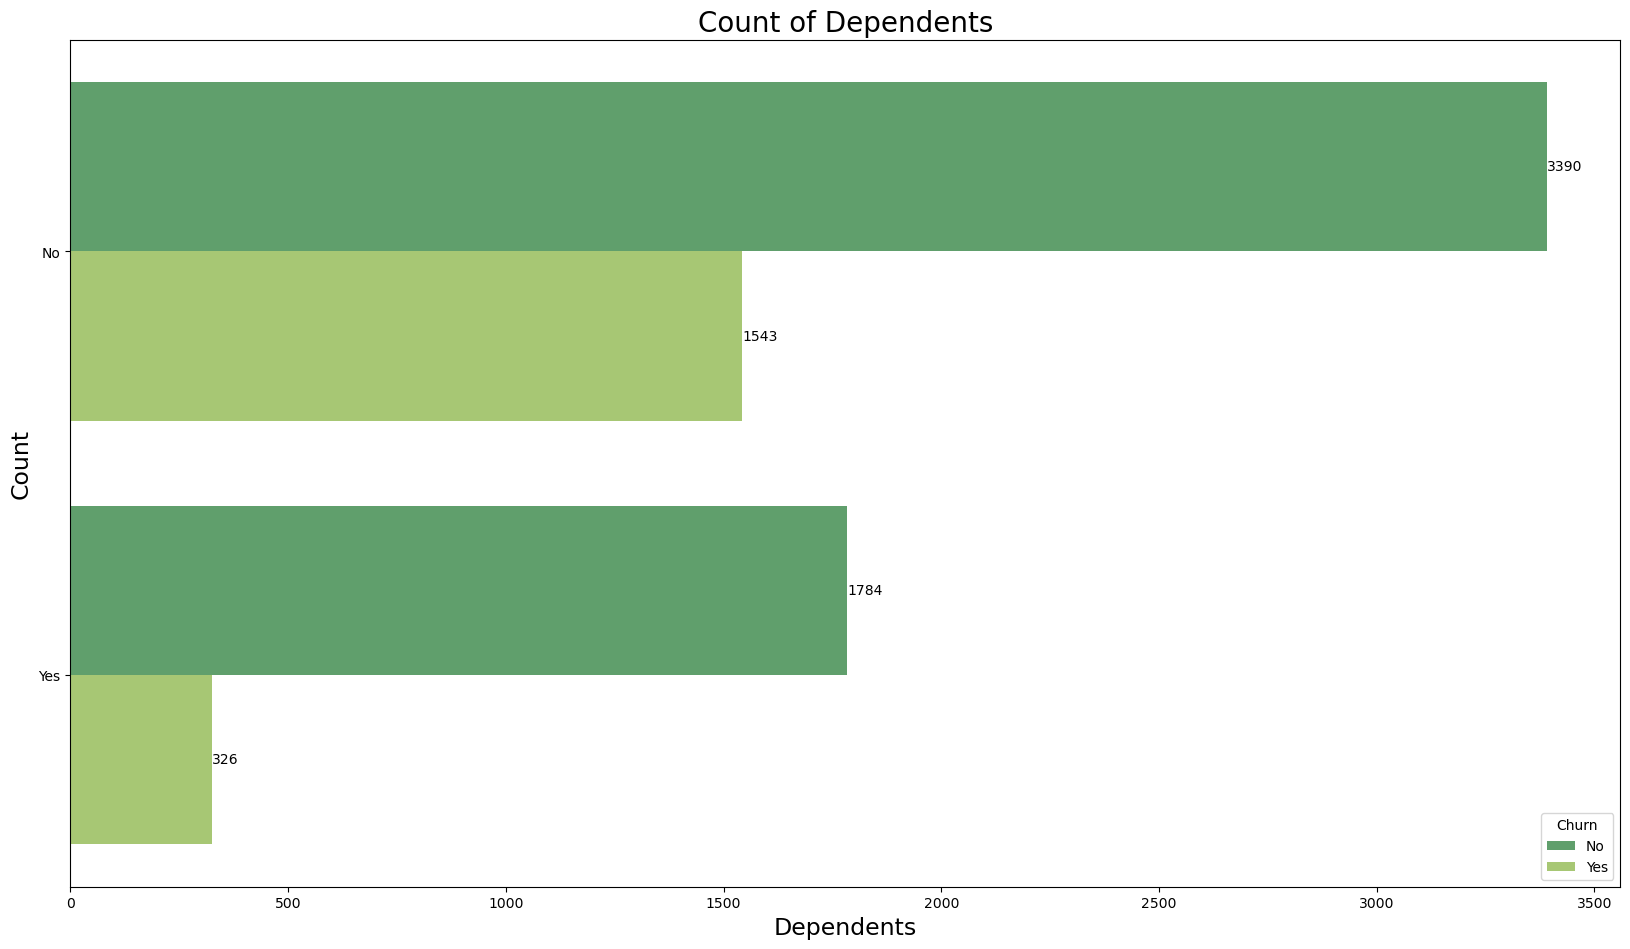

In [34]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(y ='Dependents',hue="Churn", data = df, palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Dependents', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of Dependents', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- There is a huge difference(Almost double) betweent the number of people having dependents 

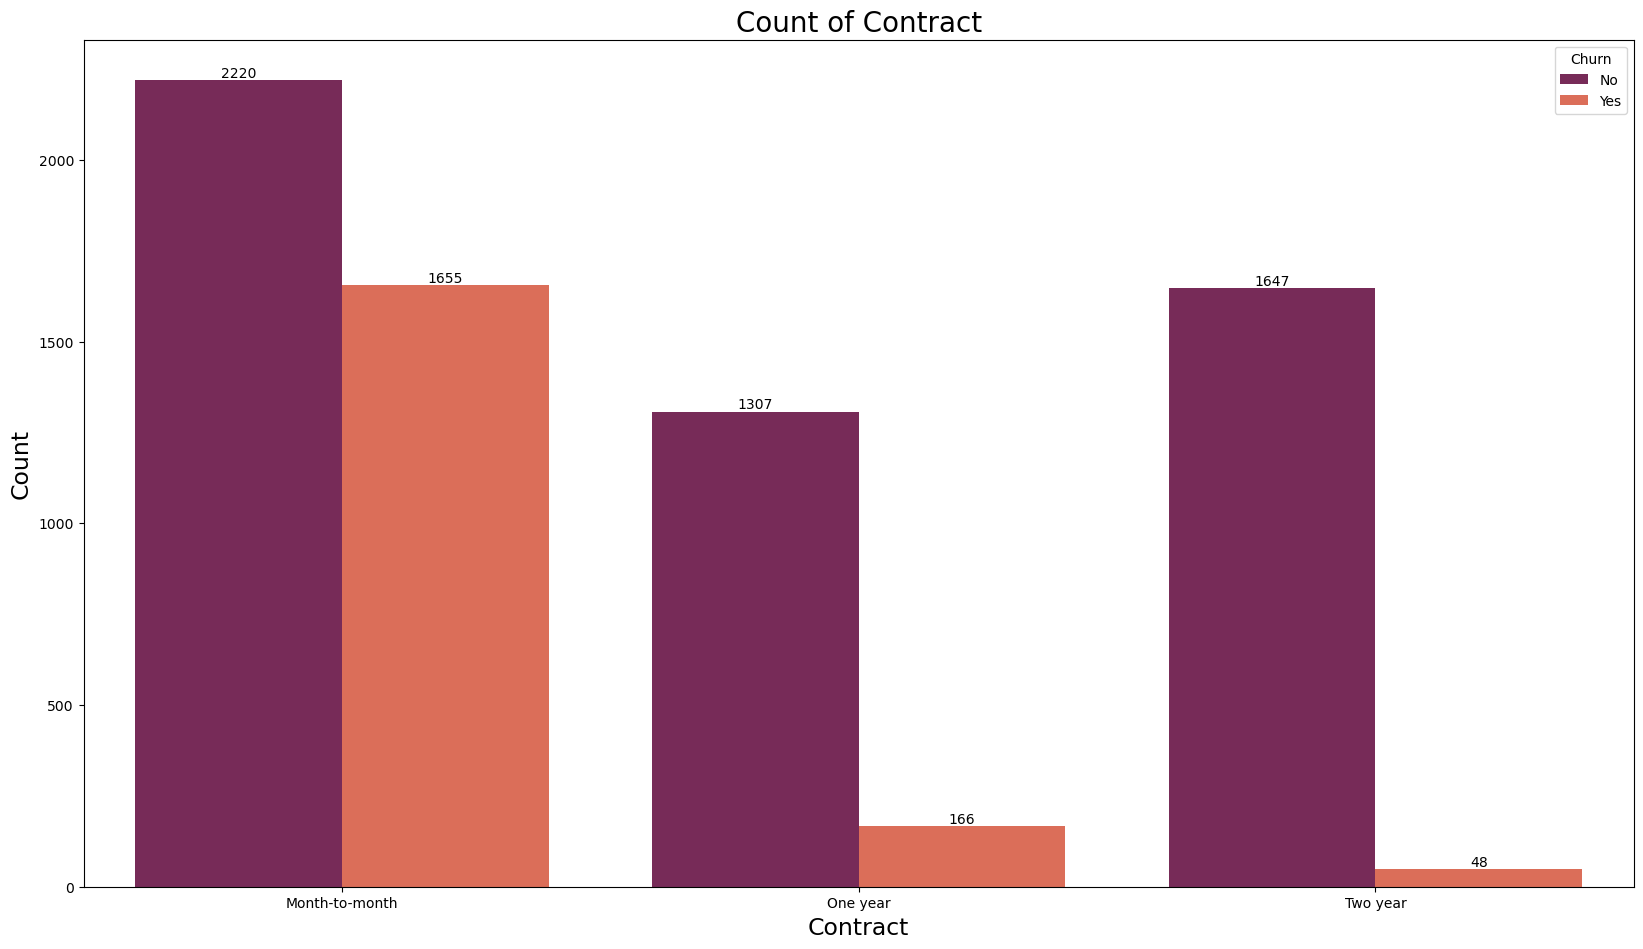

In [35]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='Contract',hue="Churn", data = df, palette='rocket')
ax.set_xlabel(xlabel = 'Contract', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of Contract', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- We have a significantly large portion of the data where the contract is month-to-month compared to either one-year and two-year contracts.
- This is true in real-life as well because most of the customers prefer to stick with month-to-month contract rather than staying with the same service for a long period of time.
- Hence, we see that this data is quite reflective of the real-world.

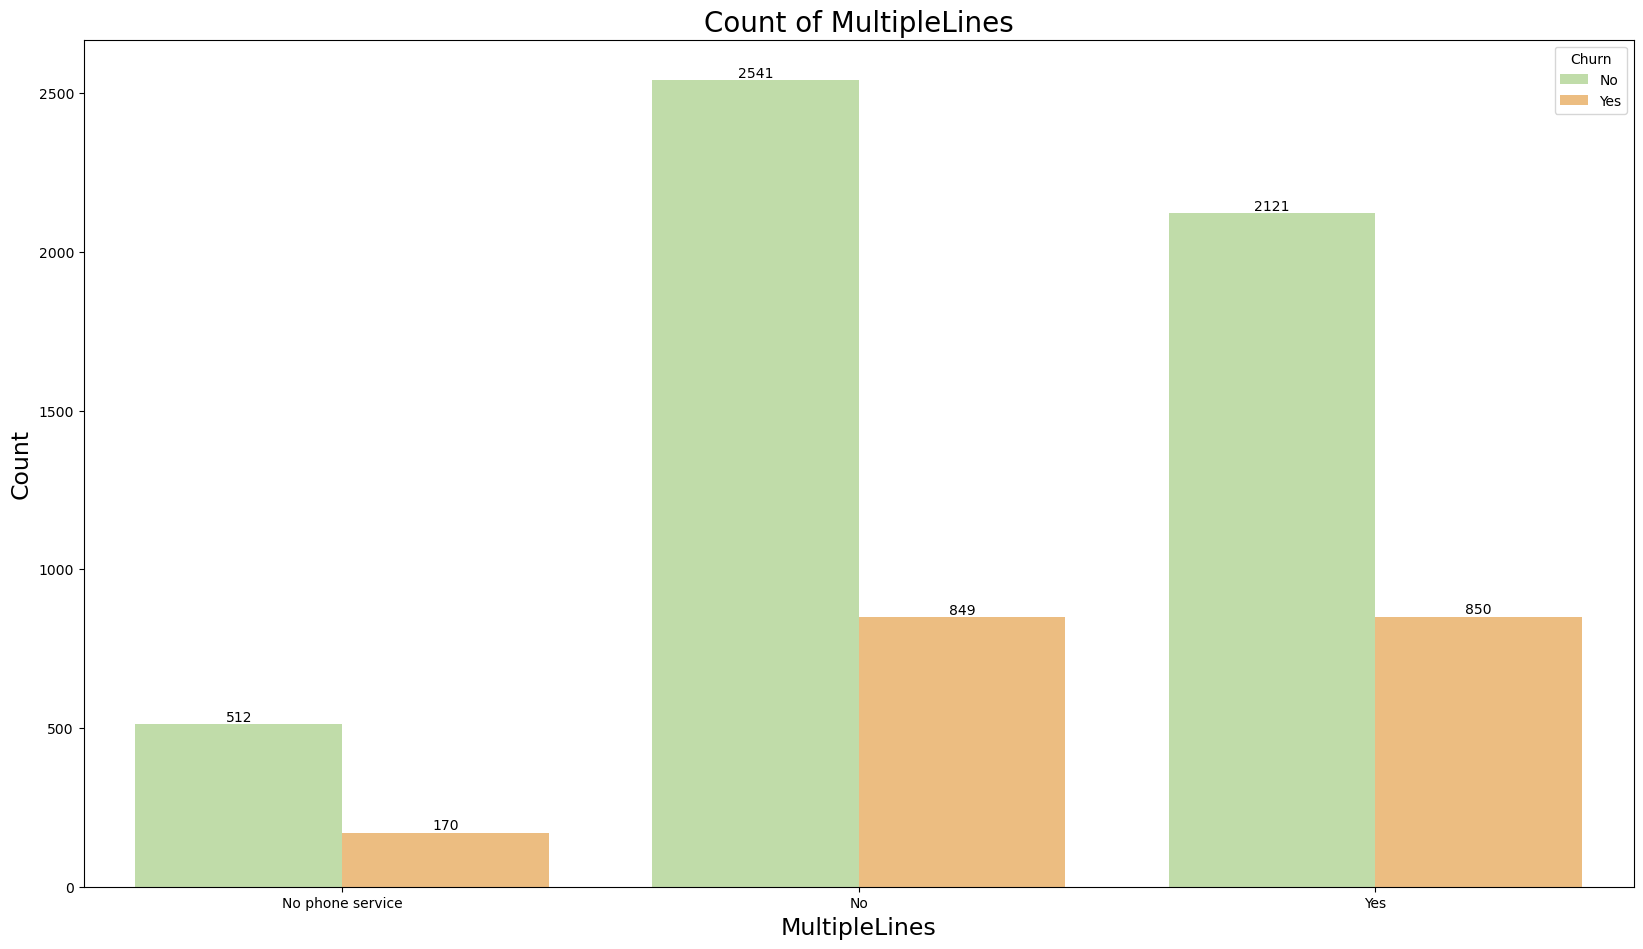

In [36]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='MultipleLines', hue="Churn", data = df, palette=random.choice(palette_values))
ax.set_xlabel(xlabel = 'MultipleLines', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of MultipleLines', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- In the above plot we can see that the number of people with no Multiple lines are clearly high, but looking to the churn stats:
- The number of people who had MultipleLines are the same to the number of prople who didn't 
- Which means that they clearly didn't liked the multiple lines service

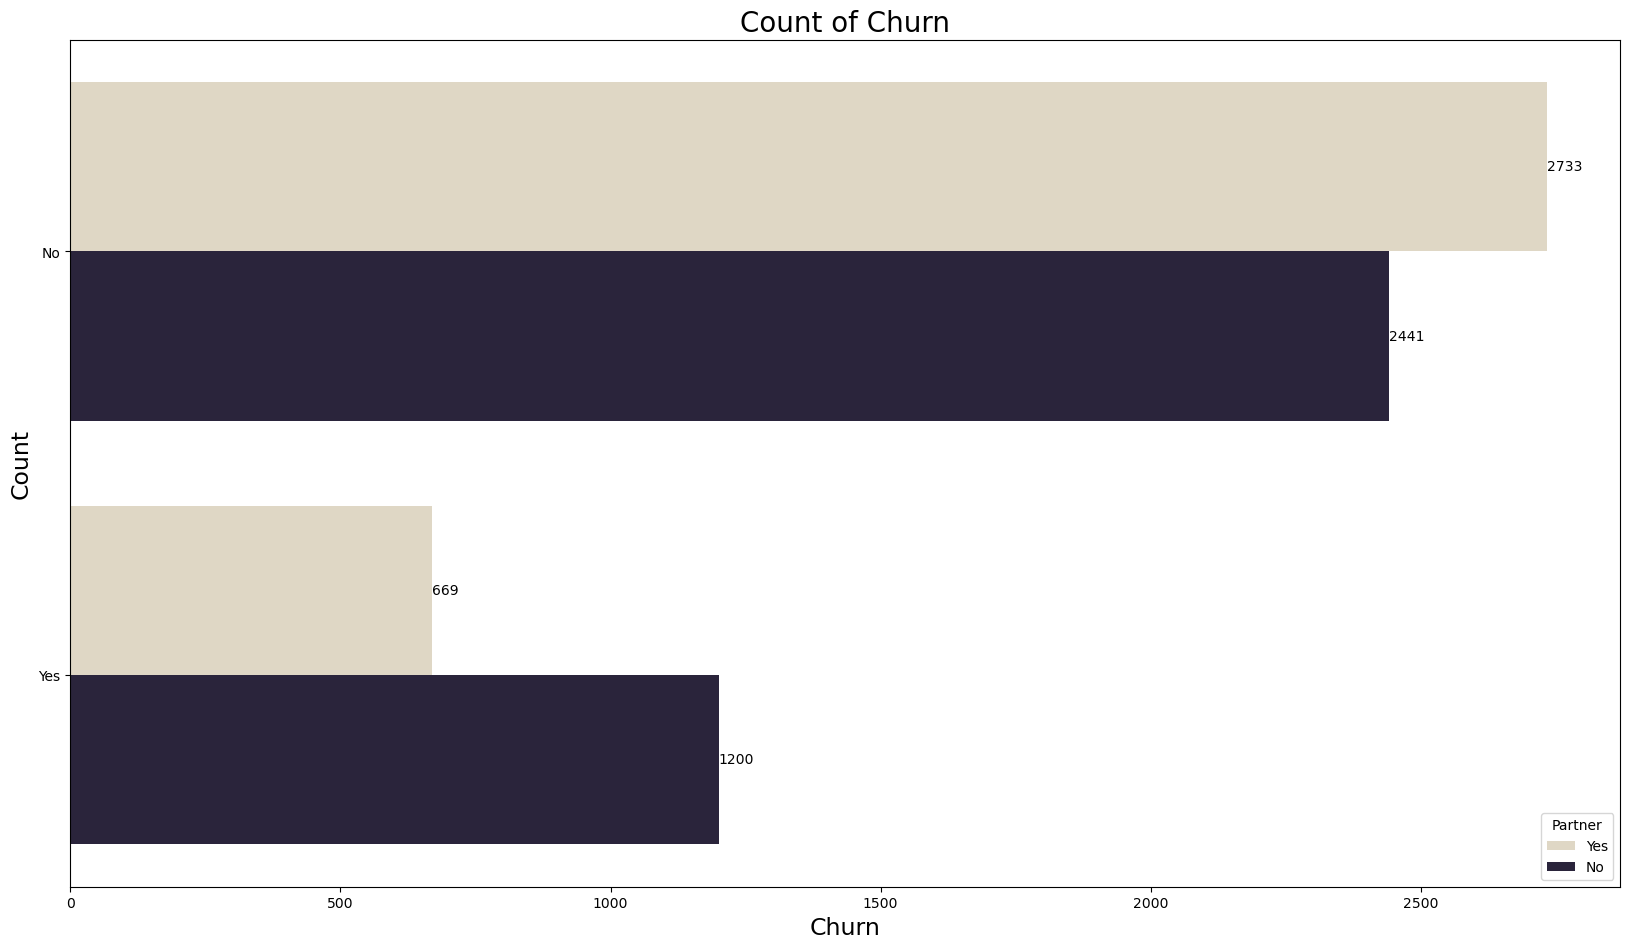

In [37]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(y ='Churn', data = df,hue="Partner", palette='ch:s=-.2,r=.6')
ax.set_xlabel(xlabel = 'Churn', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of Churn', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

- It is now important to observe the total number of customers who have churned (left the service) after a particular span of time.
- We see that a large portion of our customers did not leave the service.
- We also see that there are a few customers who left the service. We see that there is no overwhelming difference between the count of the customers who stayed in the service vs customers who have left or churned.
![](https://media.tenor.com/RJu-gcrtaooAAAAC/chris-hardwick-talking-dead.gif)

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: xlabel='InternetService', ylabel='TotalCharges'>

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



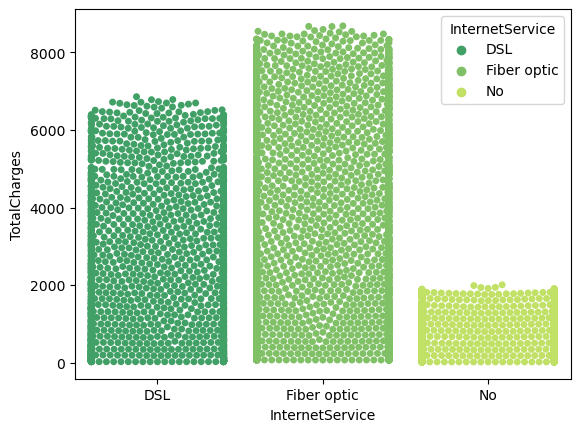

In [38]:
sns.swarmplot(x="InternetService", y="TotalCharges", data=df, hue='InternetService', palette=random.choice(palette_values))

- We can clearly see that Fiber optic is generating the most revenue for the company

In [39]:
px.strip(df, x='InternetService', y='TotalCharges', stripmode='overlay',height=600,color="Churn")

- This is a wonderful plot showing that, as clearly seen in the above plot the customer are leaving the the most from the Fiber optic plan because of the high Total Charges.

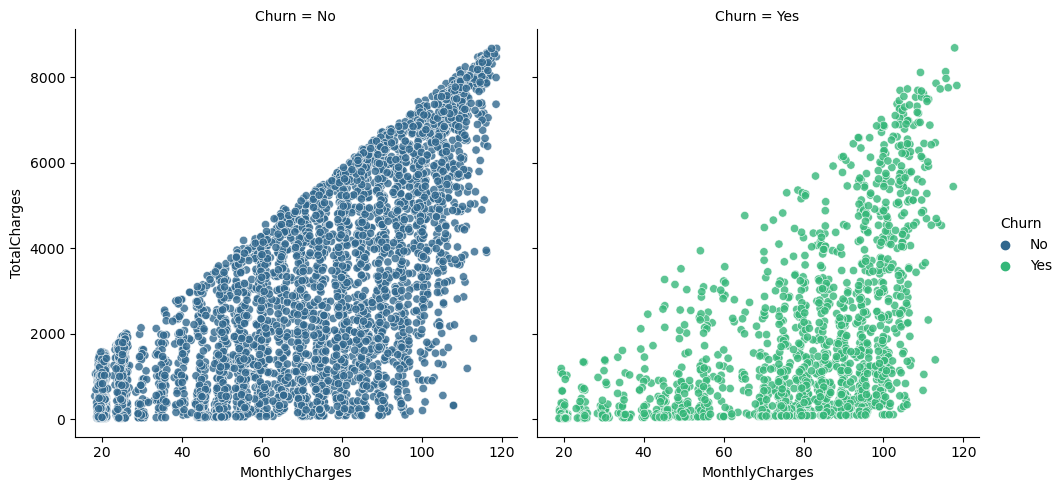

In [40]:
ax = sns.relplot(y="TotalCharges" , x="MonthlyCharges" ,data=df, alpha=0.8, col="Churn", hue="Churn", palette= random.choice(palette_values))
plt.show()

- Total Charges increase as Monthly Charges increase - as expected.

In [42]:
fig = px.scatter(df, x="TotalCharges", y="MonthlyCharges", color="Churn", title='')
fig.show()

- I have added the same above plot using ploty to make it more interactive so that you can hover around and interpret more clearly 

C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\227199777.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\227199777.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Monthly charges by churn')

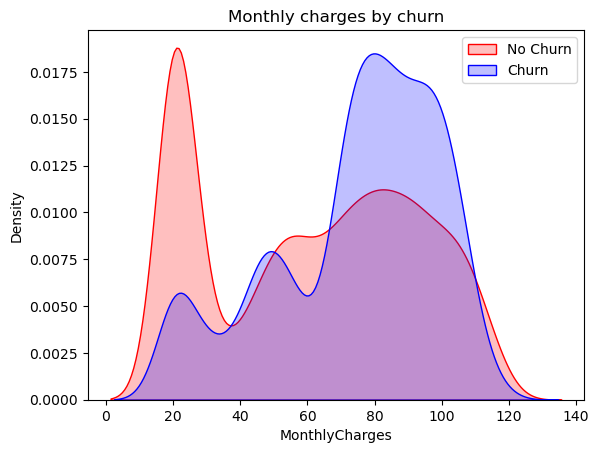

In [43]:
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'],color="Red" , shade = True)
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], color="Blue", shade = True)
ax.legend(["No Churn","Churn"])
ax.set_title('Monthly charges by churn')

# `Churn is high when Monthly Charges ar high

C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\187343230.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\187343230.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Total charges by churn')

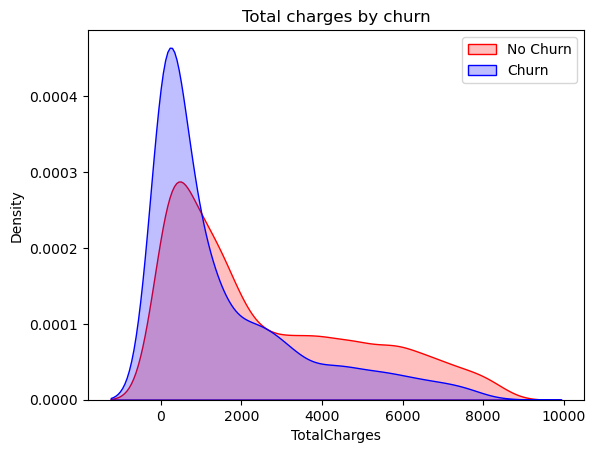

In [44]:
ax = sns.kdeplot(df['TotalCharges'][df['Churn']=='No'],color="Red" , shade = True)
ax = sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], color="Blue", shade = True)
ax.legend(["No Churn","Churn"])
ax.set_title('Total charges by churn')

# Surprising insight, as higher Churn at lower Total Charges

C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\3975612654.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\daksh\AppData\Local\Temp\ipykernel_13508\3975612654.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Tenure by churn')

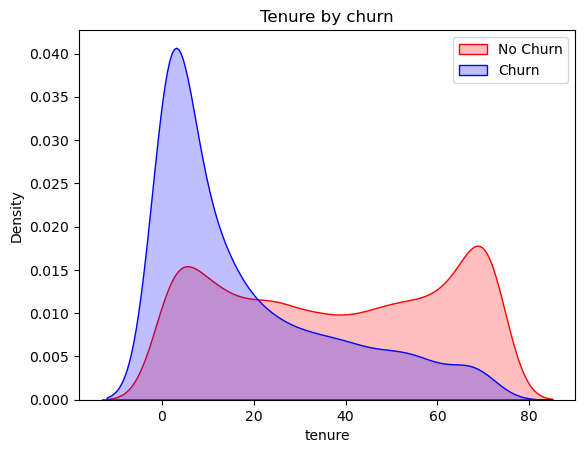

In [45]:
ax = sns.kdeplot(df['tenure'][df['Churn']=='No'],color="Red" , shade = True)
ax = sns.kdeplot(df['tenure'][df['Churn']=='Yes'], color="Blue", shade = True)
ax.legend(["No Churn","Churn"])
ax.set_title('Tenure by churn')

# More number of churn in less tenure period

- Coming to my favourite Box Plots, we will be going in depth to understand the relationship betweent different variables
- I have also plotted the same box plot below the Seaborn Box plots to make them more interactive, hover around understand and interpret the data more well.
![](https://media.tenor.com/zcs5gYi4sSMAAAAC/mindblown-omg.gif)

Text(0.5, 1.0, 'InternetService and MonthlyCharges')

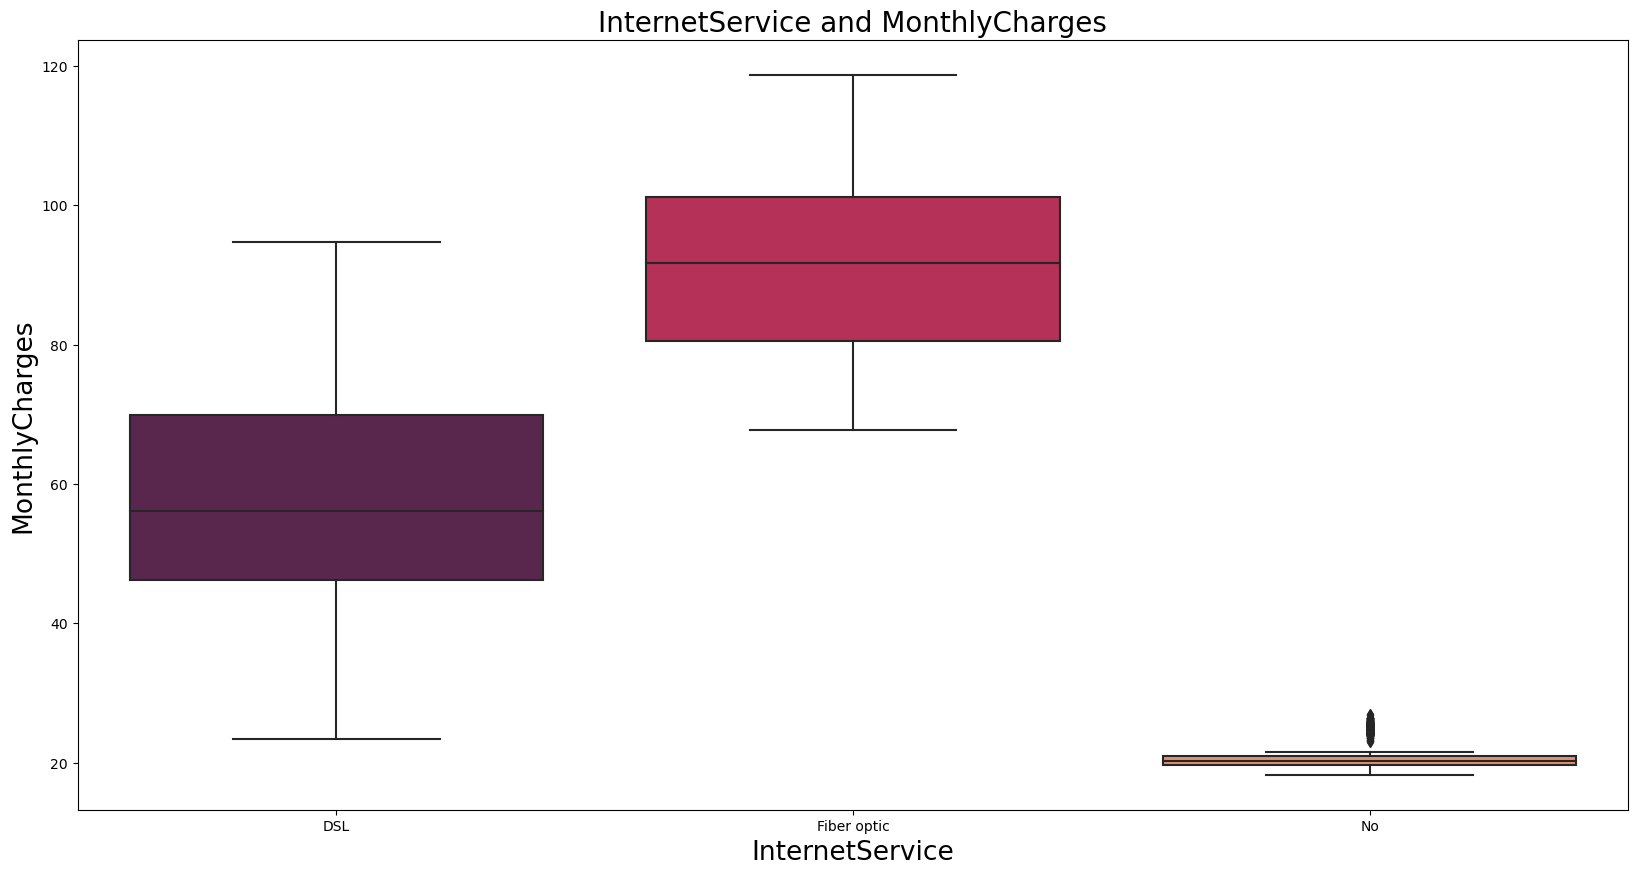

In [46]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x="InternetService", y = "MonthlyCharges" ,data =df, palette="rocket")
ax.set_xlabel(xlabel = 'InternetService', fontsize = 19)
ax.set_ylabel(ylabel = 'MonthlyCharges', fontsize = 19)
plt.title('InternetService and MonthlyCharges', fontsize = 20)

- It could easily be seen from the box plots that the people who opted for 'Fiber optic' service have higher monthly charges.
- People who opted for 'DSL' service has signifantly lower monthly charges as shown above.
- As expecte, customers who do not enroll in the internet service have low charges as shown.

In [47]:
ax=go.Figure(data=go.Box(x=df['InternetService'], y=df['MonthlyCharges'],line_color='black',fillcolor='brown'))
ax.show()

Text(0.5, 1.0, 'Churn and MonthlyCharges')

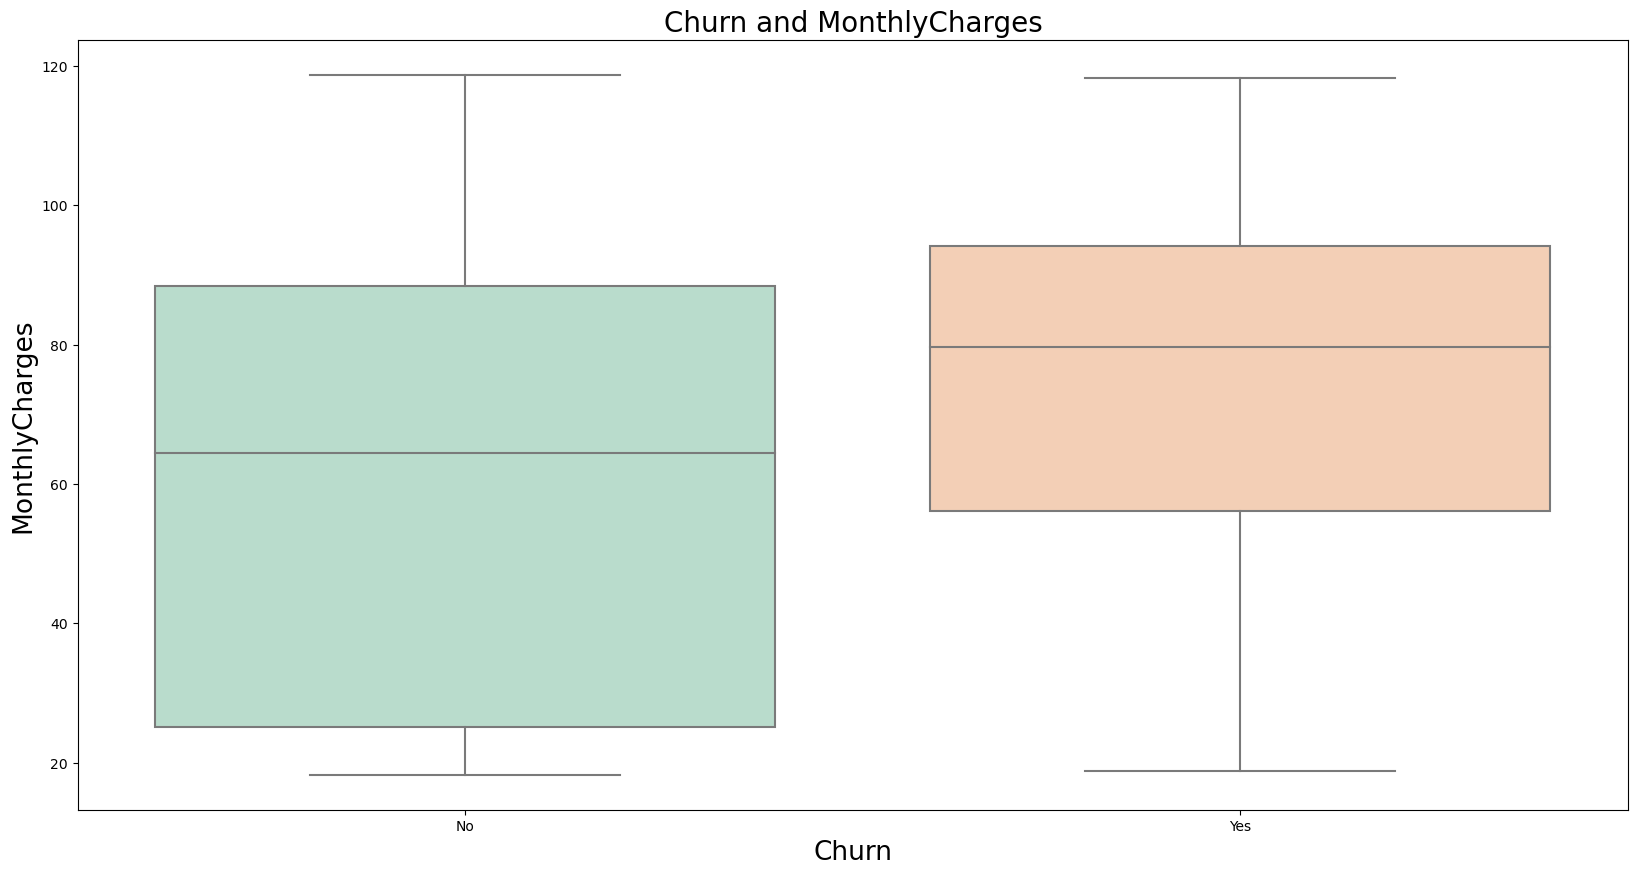

In [48]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x="Churn", y = "MonthlyCharges" ,data =df, palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Churn', fontsize = 19)
ax.set_ylabel(ylabel = 'MonthlyCharges', fontsize = 19)
plt.title('Churn and MonthlyCharges', fontsize = 20)

- It could be seen as the monthly charges are increasing, there is a higher possibility that the customers are inclined to leave the service.
- People who stay in the service usually have low monthly charges.
- Therefore, the company could take action based on the plots and reduce the prices of various services as this would ensure that most customers are inclined to stay in the service.

In [49]:
ax=go.Figure(data=go.Box(x=df['Churn'], y=df['MonthlyCharges'],line_color='black',fillcolor='seagreen'))
ax.show()

Text(0.5, 1.0, 'SeniorCitizen and TotalCharges')

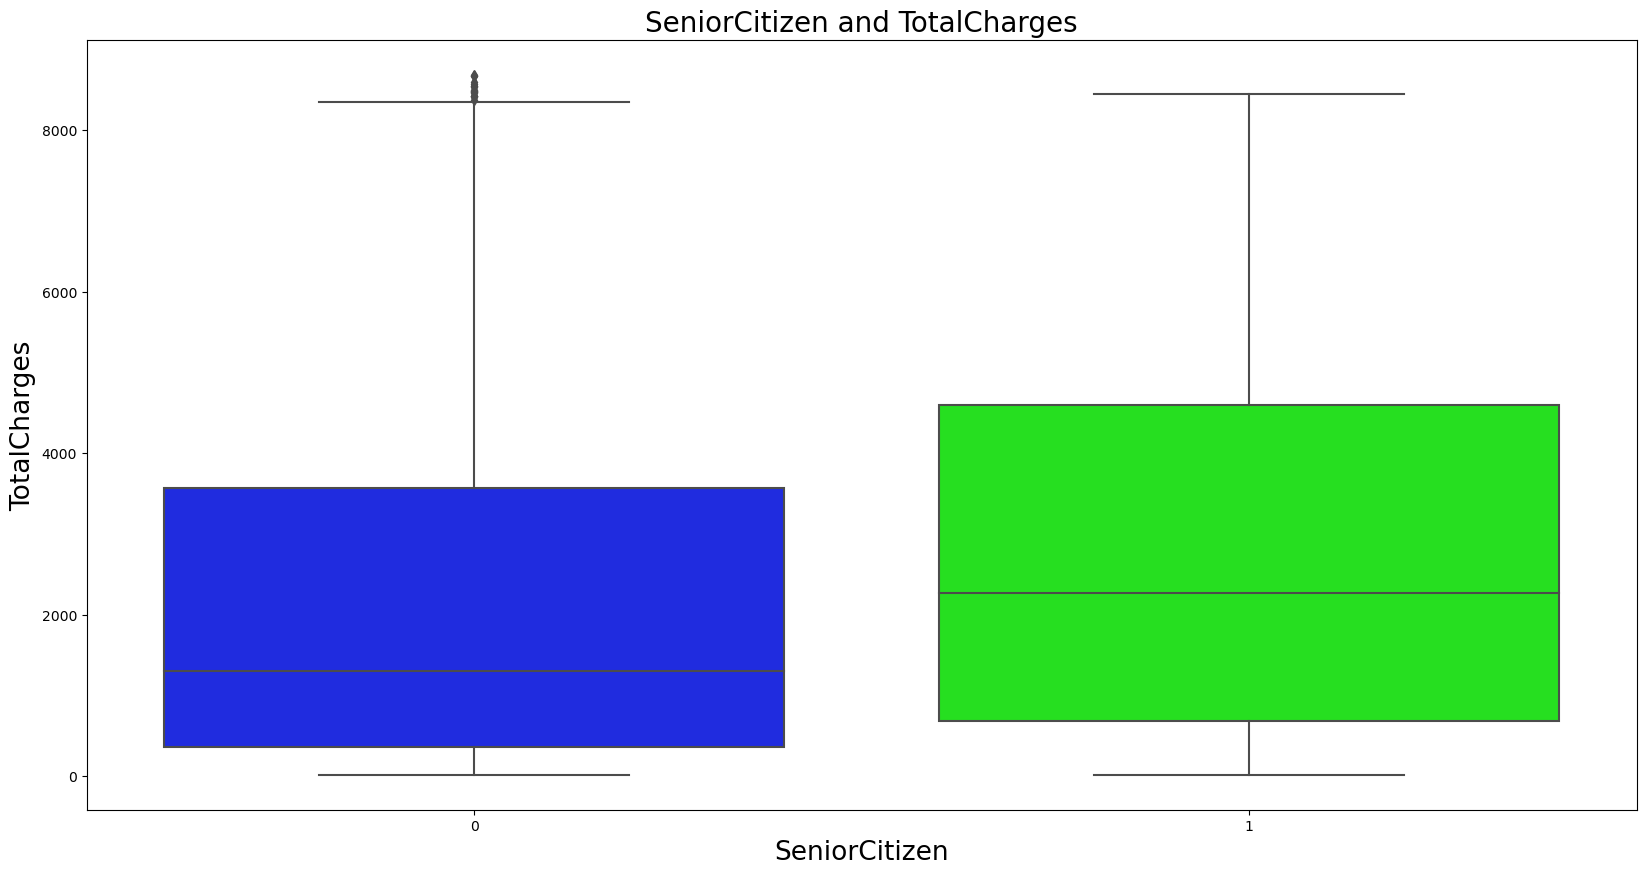

In [50]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x="SeniorCitizen", y = "TotalCharges" ,data =df, palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'SeniorCitizen', fontsize = 19)
ax.set_ylabel(ylabel = 'TotalCharges', fontsize = 19)
plt.title('SeniorCitizen and TotalCharges', fontsize = 20)

- Based on the above boxplot, it could be seen that whether a person is a senior citizen or not has an impact of the total charges.
- Senior citizens usually are quite rich and they usually work which means that they have higher income.
- As a result, they might be opting for more services from Telco leading to higher total charges.

In [51]:
ax=go.Figure(data=go.Box(x=df['SeniorCitizen'], y=df['TotalCharges'],line_color='black',fillcolor='pink'))
ax.show()

Text(0.5, 1.0, 'SeniorCitizen and MonthlyCharges')

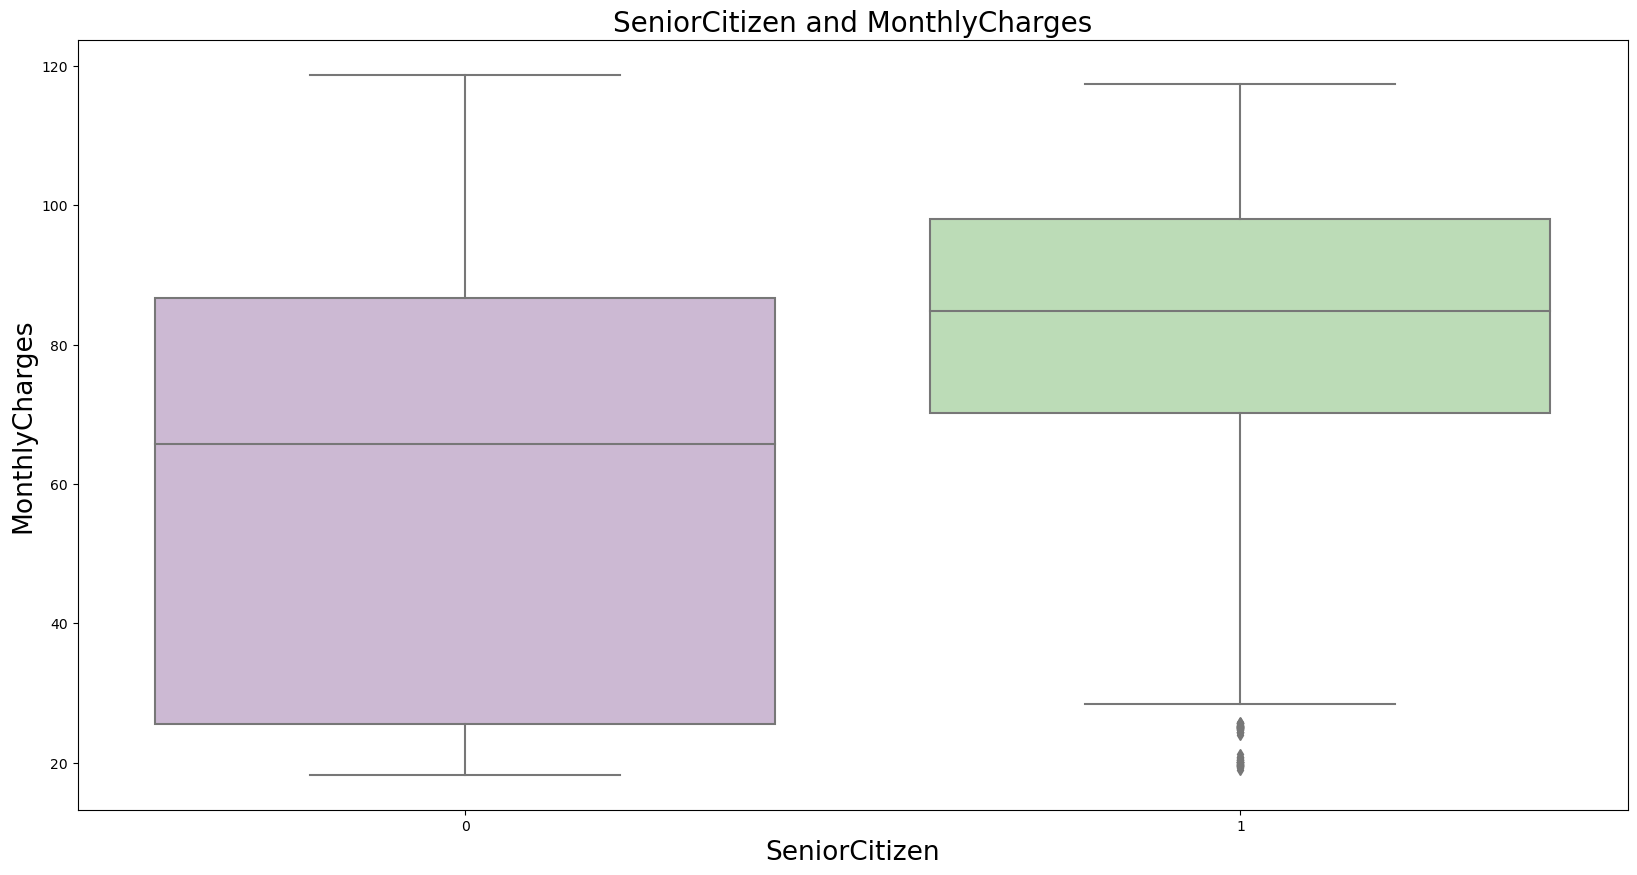

In [52]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x="SeniorCitizen", y = "MonthlyCharges" ,data =df, palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'SeniorCitizen', fontsize = 19)
ax.set_ylabel(ylabel = 'MonthlyCharges', fontsize = 19)
plt.title('SeniorCitizen and MonthlyCharges', fontsize = 20)

- Monthly charges are significantly higher for Senior Citizens compared to Non-Senior Citizens respectively.
- As a result, this leads us to believe that senior citizens are more inclined to add more services from Telco.
- Therefore, Telco could take action and provide more interesting services to senior citizens compared to non-senior citizens.

In [53]:
ax=go.Figure(data=go.Box(x=df['SeniorCitizen'], y=df['MonthlyCharges'],line_color='black',fillcolor='maroon'))
ax.show()

Text(0.5, 1.0, 'DeviceProtection and TotalCharges')

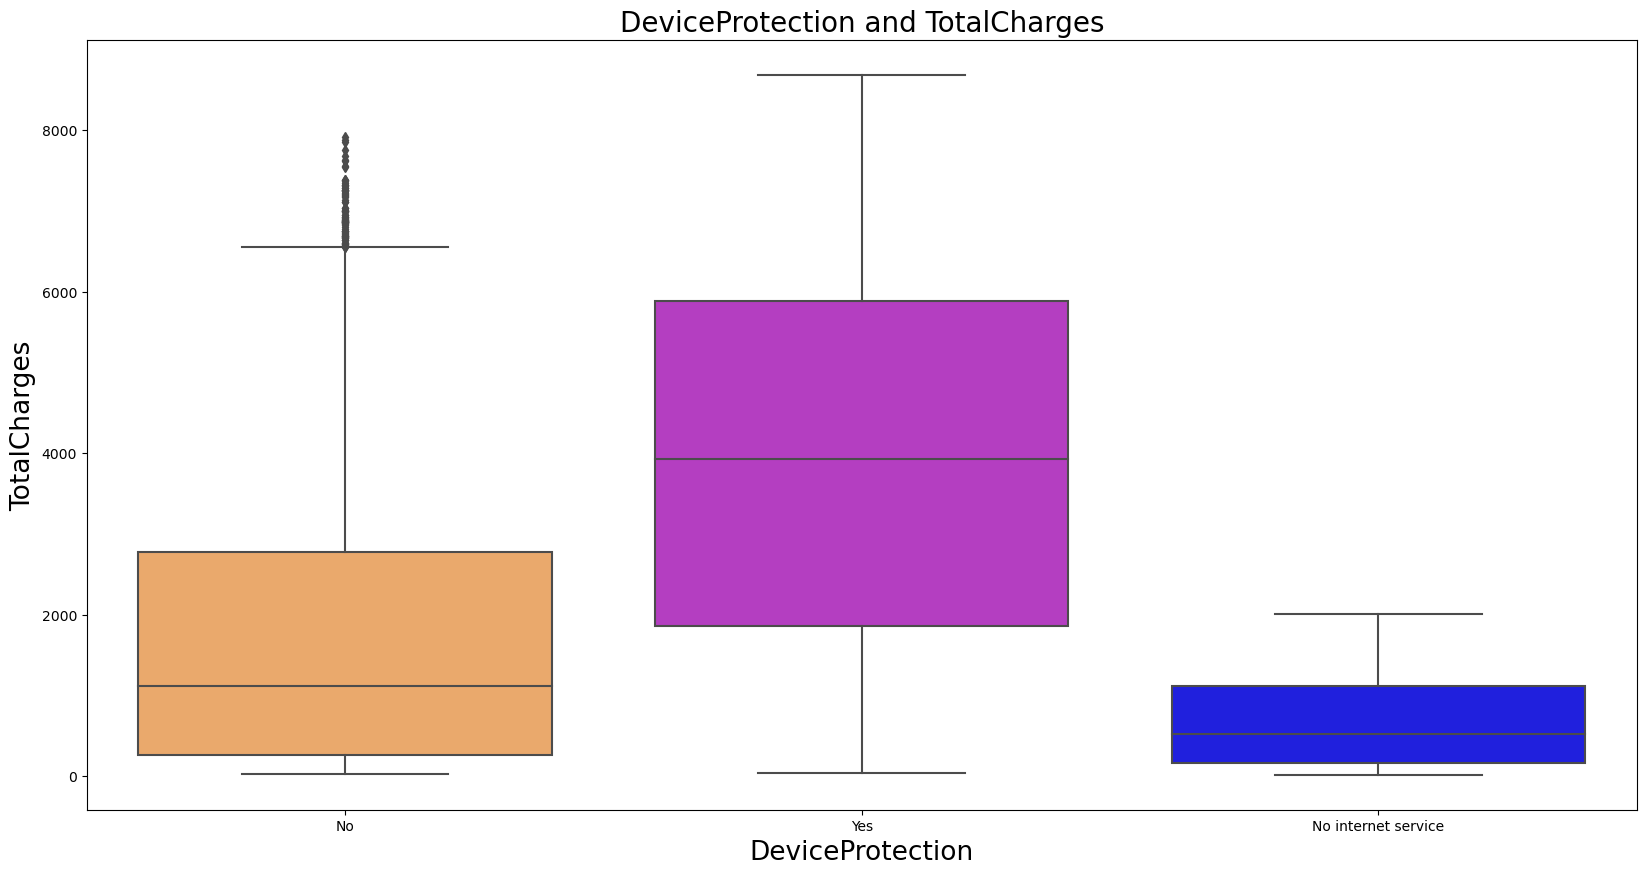

In [54]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x="DeviceProtection", y = "TotalCharges" ,data =df, palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'DeviceProtection', fontsize = 19)
ax.set_ylabel(ylabel = 'TotalCharges', fontsize = 19)
plt.title('DeviceProtection and TotalCharges', fontsize = 20)

- Device Protection Plans have a very high cost as could be seen from the above.
- This means that people are paying a lot for Device Protection plans.
- We have seen from the previous plots that higher the charges, the more inclined are the customers to leave the Telco service.
- Hence, Telco could take steps to reduce the prices for the Device Protection plans.

In [55]:
ax=go.Figure(data=go.Box(x=df['DeviceProtection'], y=df['TotalCharges'],line_color='black',fillcolor='magenta'))
ax.show()

# When will this EDA end!!!!!!
![](https://media.tenor.com/nk98ltn3VTUAAAAC/how-long-scare-glow.gif)

Text(0.5, 1.0, 'DeviceProtection wise TotalCharges')

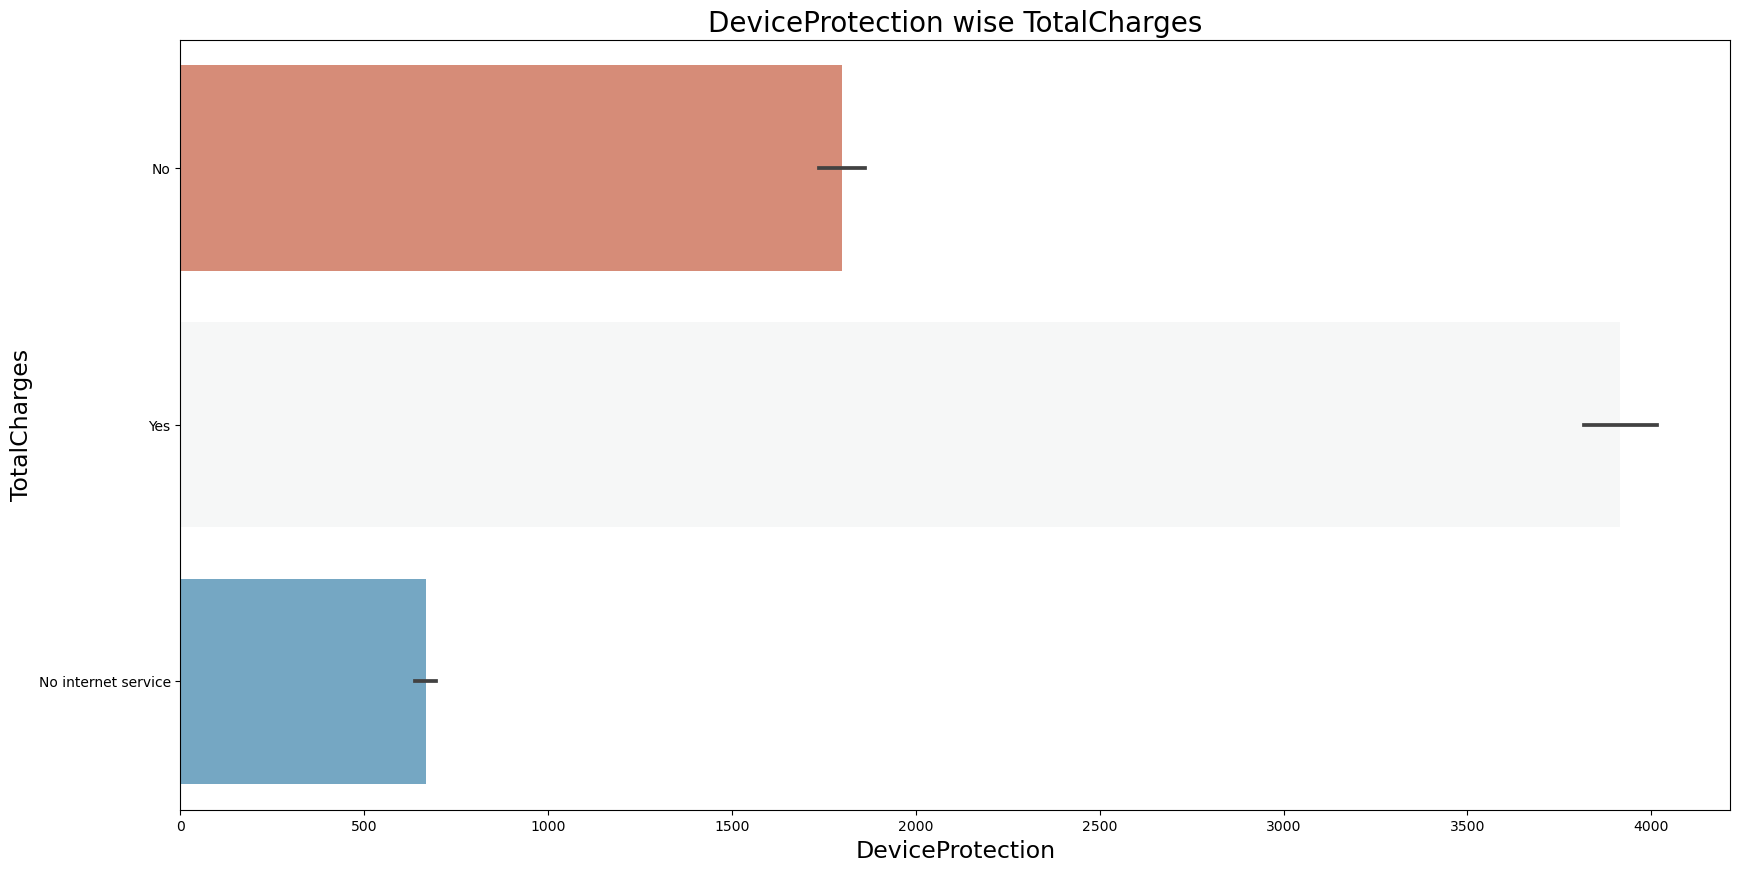

In [56]:
plt.figure(figsize = (20,10))
ax = sns.barplot(y = 'DeviceProtection', x = 'TotalCharges', data = df, palette = random.choice(palette_values))
ax.set_xlabel(xlabel = 'DeviceProtection', fontsize = 17)
ax.set_ylabel(ylabel = 'TotalCharges', fontsize = 17)
ax.set_title(label = 'DeviceProtection wise TotalCharges', fontsize = 20) 

- This is another way to represent the Device Projection plans and the total charges.
- We have taken a barplot which represents the average total charges for all the customers based on the device projection plans.

Text(0.5, 1.0, 'InternetService wise TotalCharges')

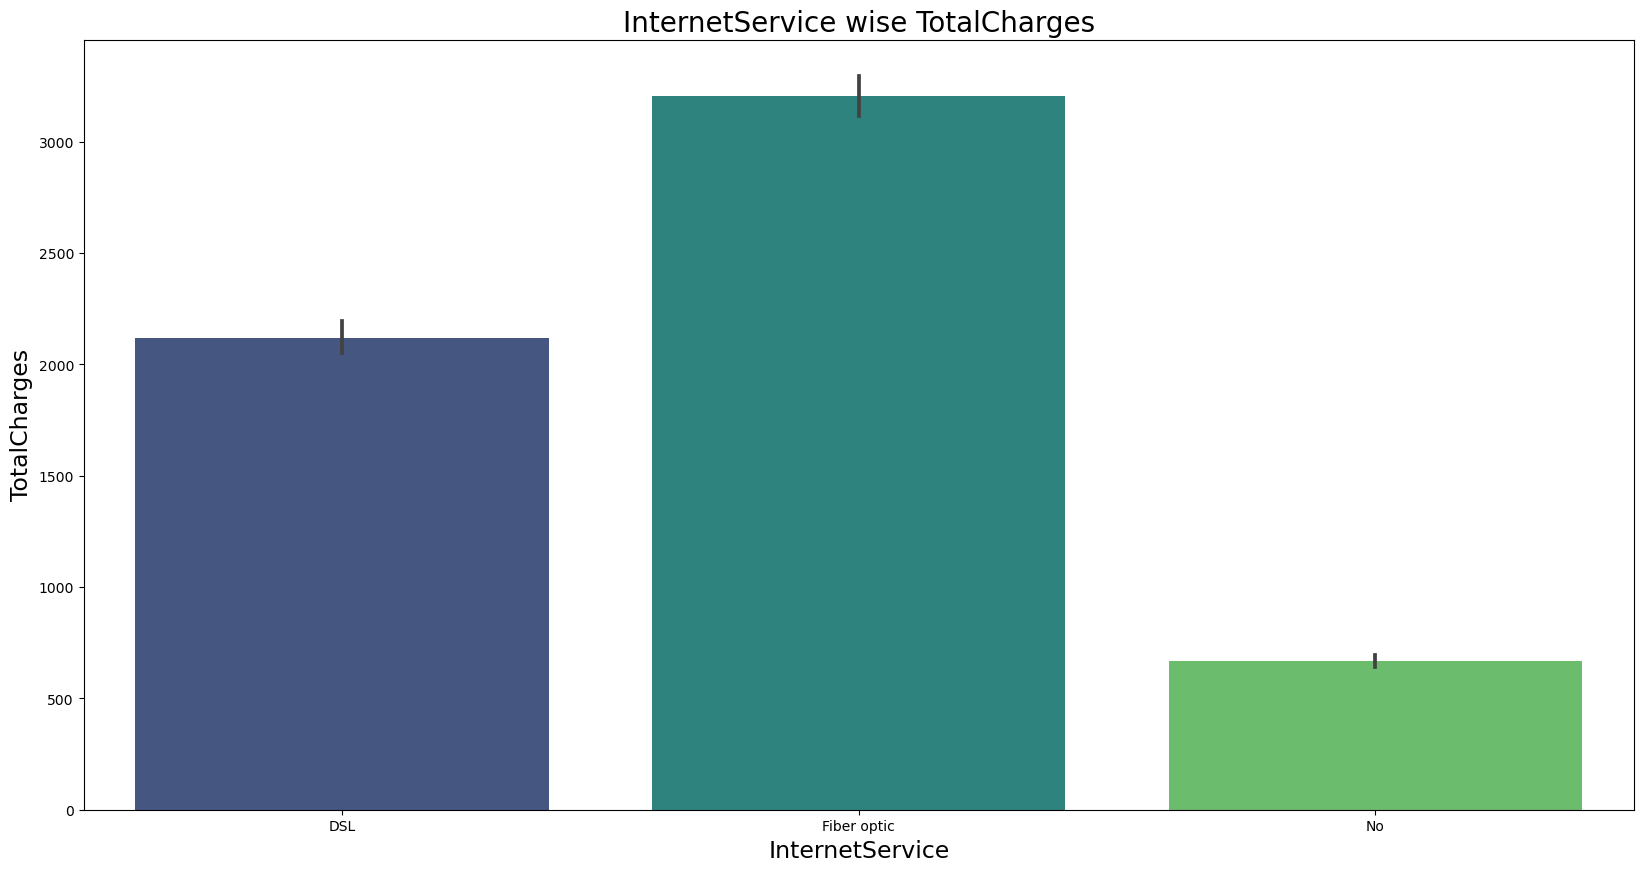

In [57]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'InternetService', y = 'TotalCharges', data = df, palette = random.choice(palette_values))
ax.set_xlabel(xlabel = 'InternetService', fontsize = 17)
ax.set_ylabel(ylabel = 'TotalCharges', fontsize = 17)
ax.set_title(label = 'InternetService wise TotalCharges', fontsize = 20) 

- Based on this plot, we see that a large portion of customers from Fiber optic option tend to leave the service compared to other internet services.
- Other services such as DSL service have higher number of customers who are willing to stay with the service.
- Therefore, The company might consider what might be the potential case for customers who have taken fiber option to leave the service.
- If they could come up with the right tactics to improve their fiber option service, this ensures that a large portion of customers are retained.

Text(0.5, 1.0, 'PaperlessBilling wise MonthlyCharges')

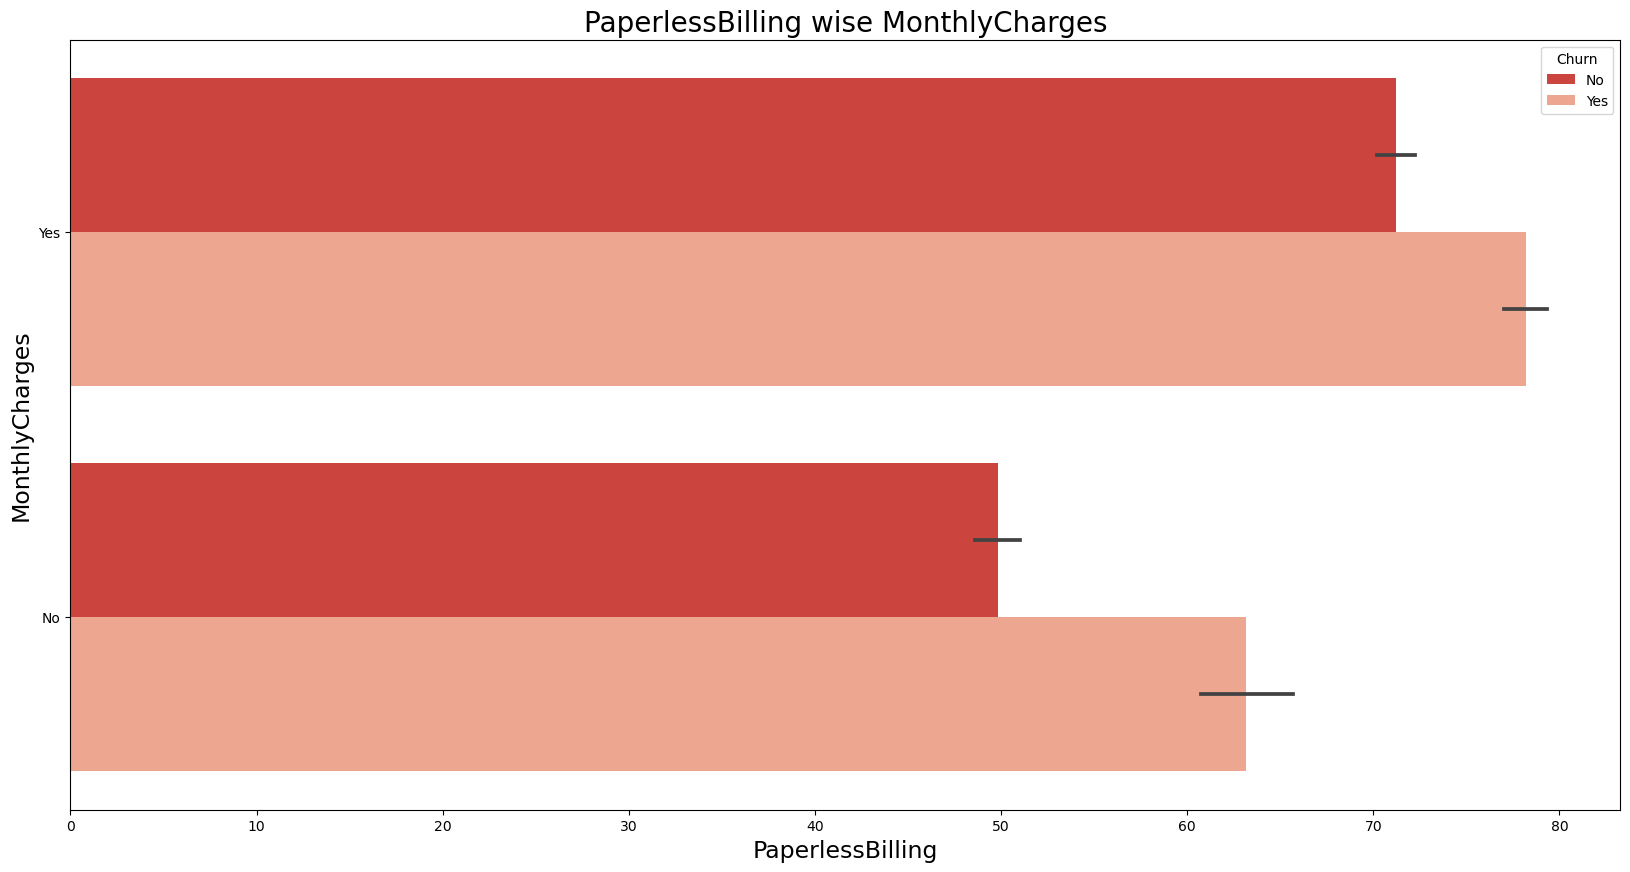

In [58]:
plt.figure(figsize = (20,10))
ax = sns.barplot(y = 'PaperlessBilling', x = 'MonthlyCharges', hue = 'Churn', data = df, palette = random.choice(palette_values))
ax.set_xlabel(xlabel = 'PaperlessBilling', fontsize = 17)
ax.set_ylabel(ylabel = 'MonthlyCharges', fontsize = 17)
ax.set_title(label = 'PaperlessBilling wise MonthlyCharges', fontsize = 20) 

- Paperless billing customers usually leverage the freedom to use their credit/debit cards and pay more amount compared to the others who prefer paper billing options.
- This is because it is more convenient to use credit/debit cards to make transaction compared to other services.
- Hence, whenever a new customer is going to register for the service, Telco can estimate the total charges that might be taken into consideration based on whether a customer opts for paperless billing or not.


# Converting Churn from "Yes" and "No" to 0 and 1 to find the Correlation

In [59]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [60]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85      0  
1               Mailed check          56.95       1889.50      0  
2               Mailed check          53.85        108.15      1  
3  Bank transfer (automatic)          42.30       1840.75      0  
4           Electronic check          70.70        151.65      1  

[5 rows x 21 columns]

# Categorizing the columns, Numeric and Categorical

In [61]:
df_categorical = df.select_dtypes(include = "object")

In [62]:
df_numerical = df.select_dtypes(exclude = "object")

In [63]:
df_categorical.head()

customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  
0           Electronic check  
1               Mailed check  
2               Mailed check  
3  Bank transfer (automatic)  
4           Electronic check

In [64]:
df_numerical.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
0              0       1           29.85         29.85      0
1              0      34           56.95       1889.50      0
2              0       2           53.85        108.15      1
3              0      45           42.30       1840.75      0
4              0       2           70.70        151.65      1

# Ploting a pairplot to see the numeric variables relationship at once

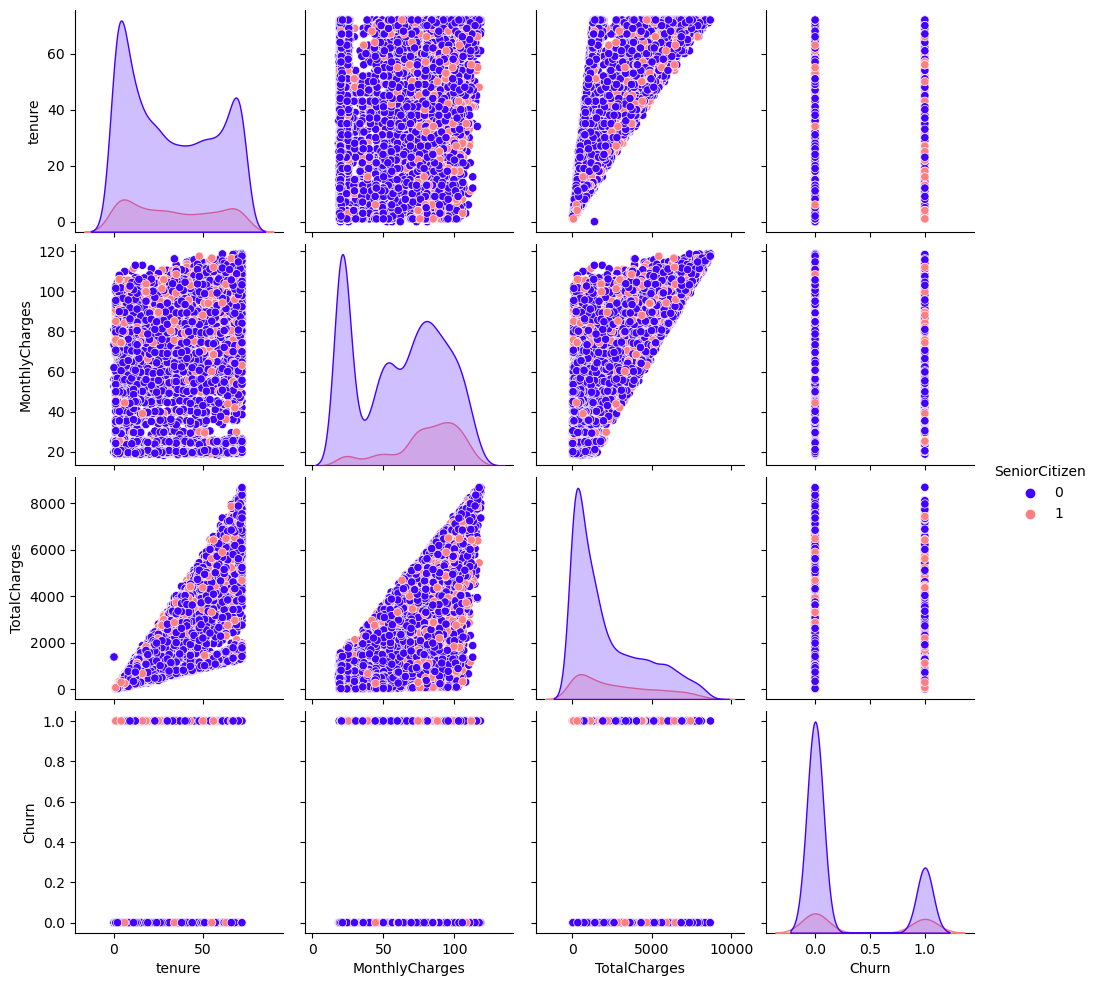

In [65]:
sns.pairplot(df_numerical, hue = "SeniorCitizen", palette = random.choice(palette_values))

### Dropping the CustomerID column, as it have been considered as a categorical column
- Though it had an object data type the system was not able identify that there are no unique values in the column
- Therefore, i had to delete it myself.

In [66]:
df_categorical.drop(['customerID'], axis = 1, inplace = True)

### Making a dummy DataFrame for the correlation, as we can't see the coorelation between the variable without converting the data into dummy data.

In [67]:
pd.get_dummies(df_categorical.gender, drop_first = True).head()

Male
0     0
1     1
2     1
3     1
4     0

In [68]:
df_dummy_2 = pd.get_dummies(df_categorical, drop_first = True)

In [69]:
df_final = pd.concat([df_dummy_2, df_numerical], axis = 1)

# This is our final dummy dataset.
![](https://media.tenor.com/C8j0TGZFxFwAAAAM/mind-blown-whoa.gif)

In [70]:
df_final.head()

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 0   
1            1            0               0                 1   
2            1            0               0                 1   
3            1            0               0                 0   
4            0            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
0                                   0                   0  ...   
1                                   0                   1  ...   
2                                   0                   1  ...   
3                                   0                   1  ...   
4                                   0                   0  ...   

   Contract_Two year  PaperlessBilling_Yes  \
0                  0                     1   
1                  0                     0   
2                  0                     1   
3                  0                     0   
4                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  SeniorCitizen  tenure  MonthlyCharges  \
0                           0              0       1           29.85   
1                           1              0      34           56.95   
2                           1              0       2           53.85   
3                           0              0      45           42.30   
4                           0              0       2           70.70   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1  
3       1840.75      0  
4        151.65      1  

[5 rows x 31 columns]

<Axes: >

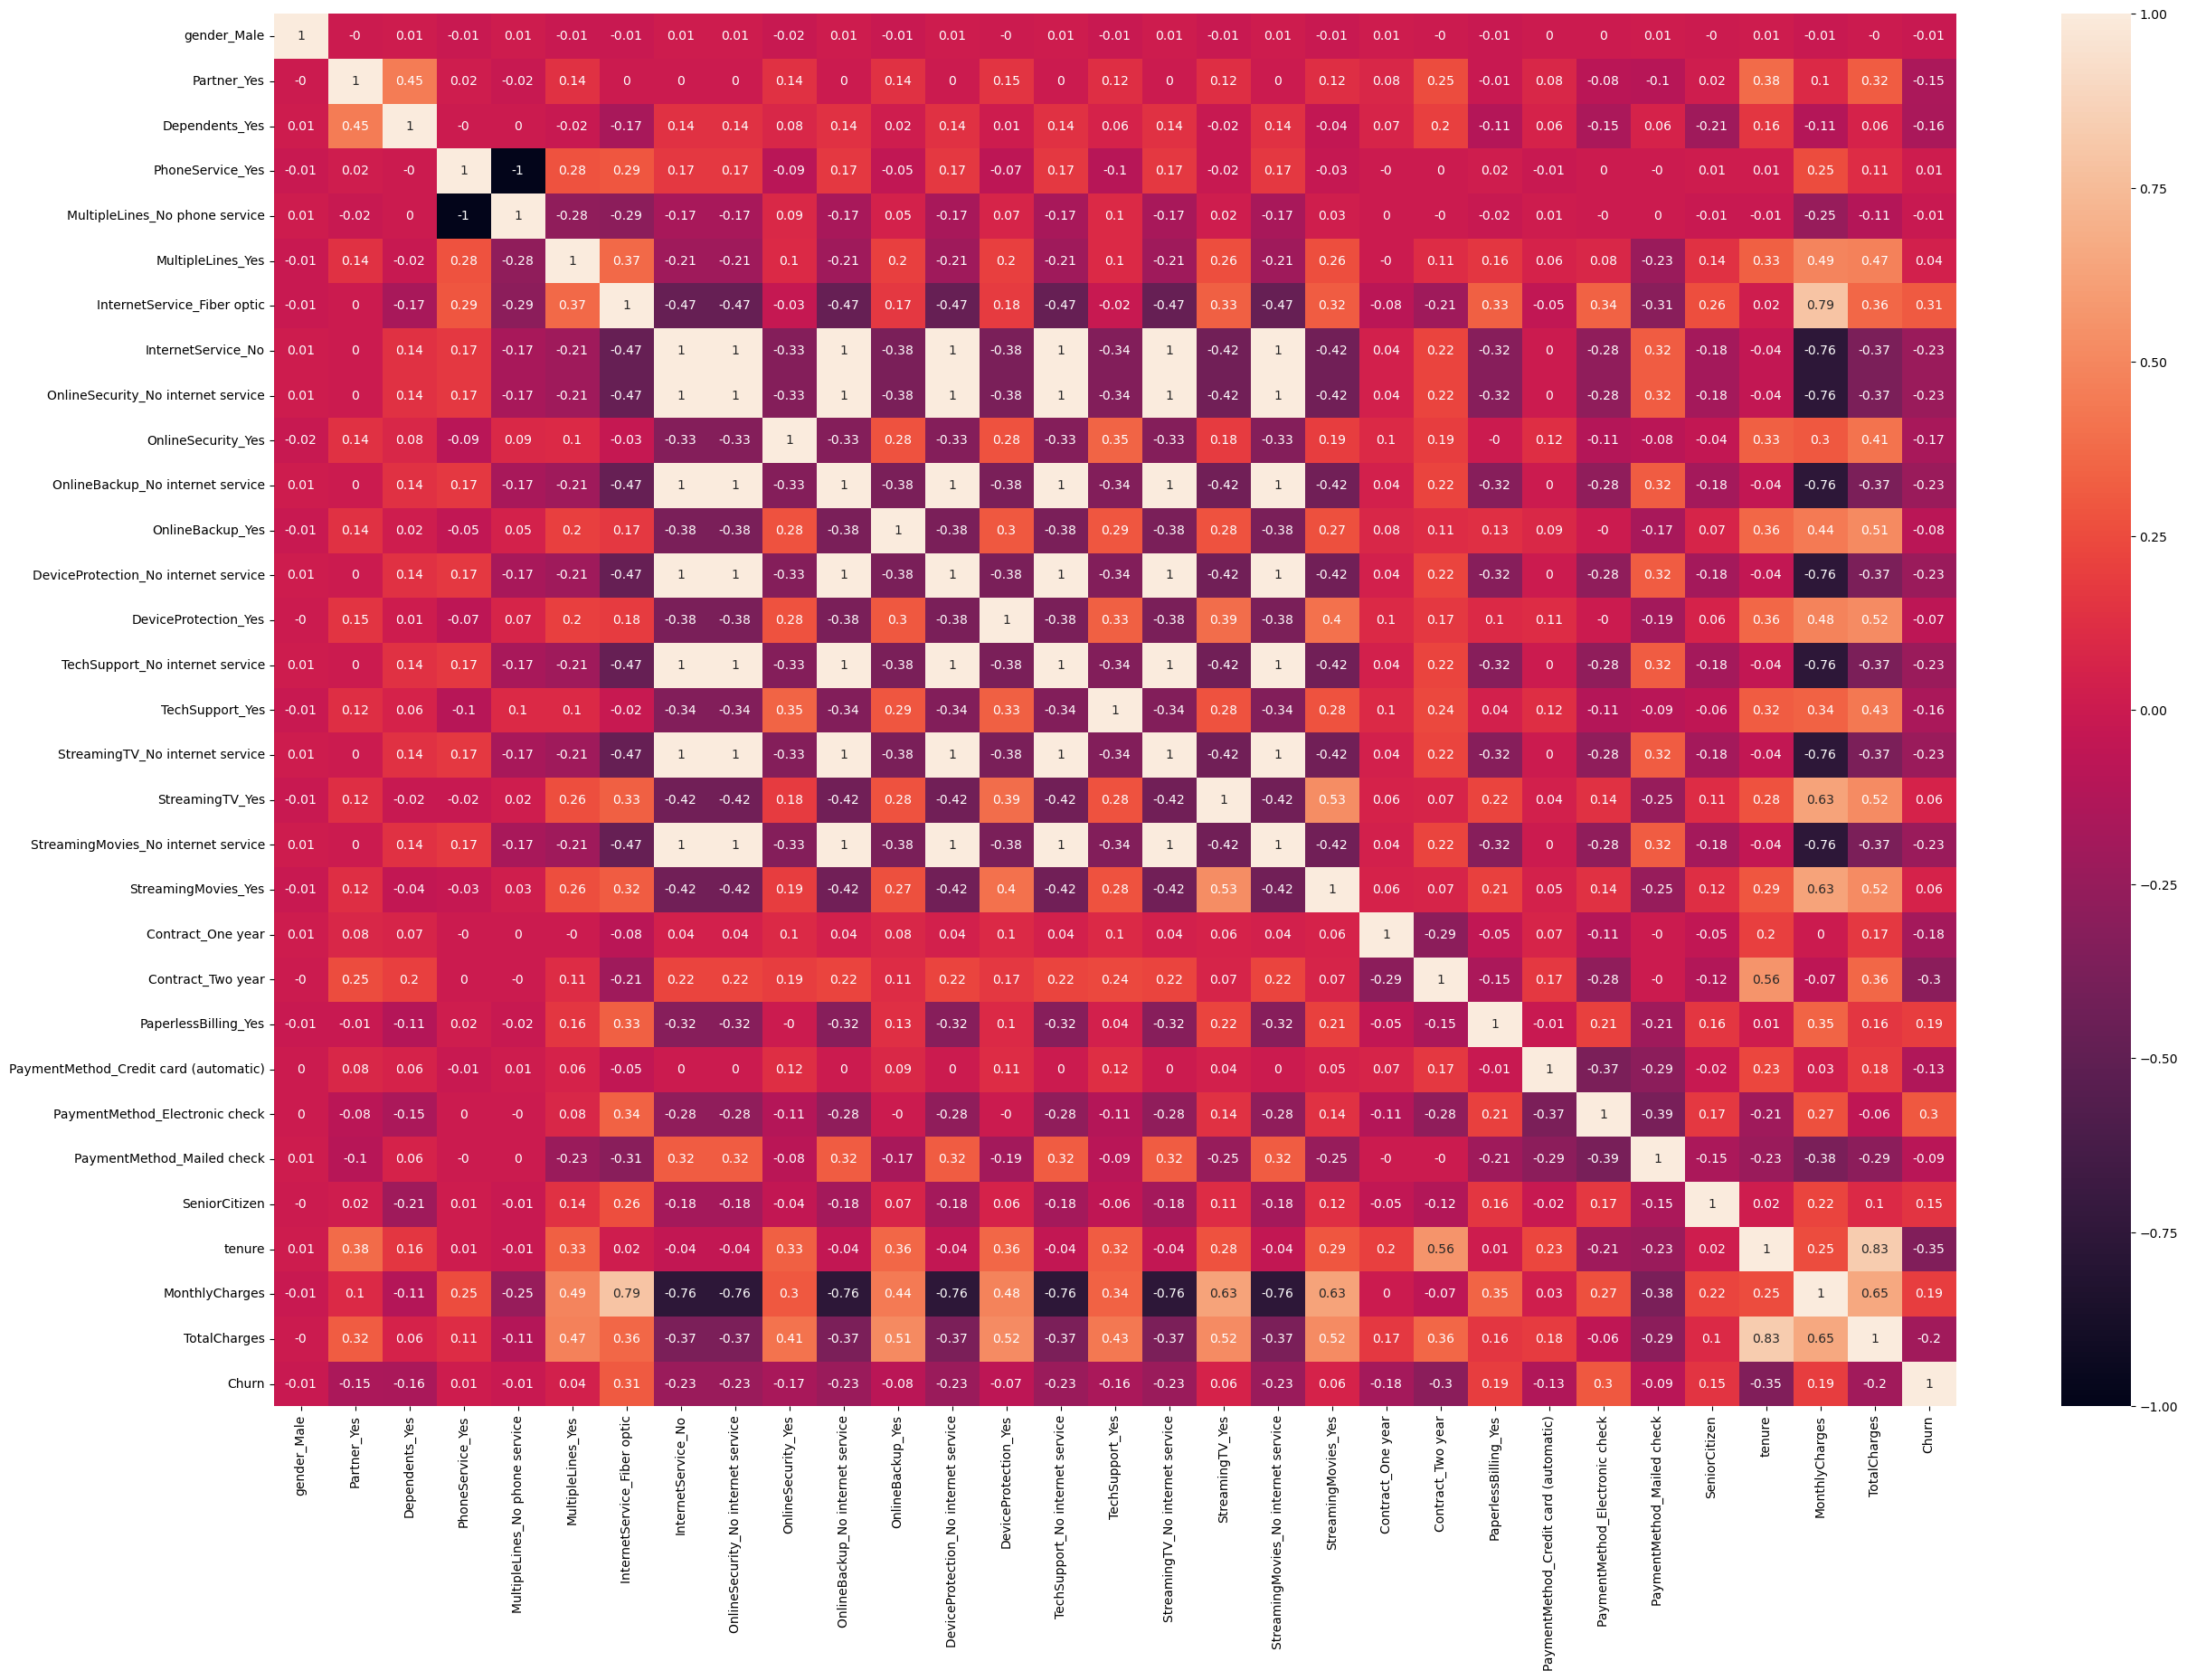

In [71]:
plt.figure(figsize = (30, 20))
sns.heatmap(np.round(df_final.corr(),2),annot=True)

- Based on the heatmap given, it could be seen that there is a strong correlation between the TotalCharges and the Tenure of staying in a service. This is true in real-life because the longer a customer stays in a service, the more willing he/she are going to be using that same service along with additional features or add-ons as well.
- It could also be seen that people who have opted for phone services from the company did not opt for multiple lines of the same service. Therefore, we get to know that customers are open to adding multiple lines of different service providers rather than staying with the same phone service provider.
- Monthly charges are negatively correlated with whether a person has internet service, online security, online backup internet security, internet tech support, streaming TV service and streaming movies service.
![](https://media.tenor.com/dP_s1CQnYjkAAAAd/marley-kkt-throwing-laptop.gif)

# A barplot showing the correlation

<Axes: >

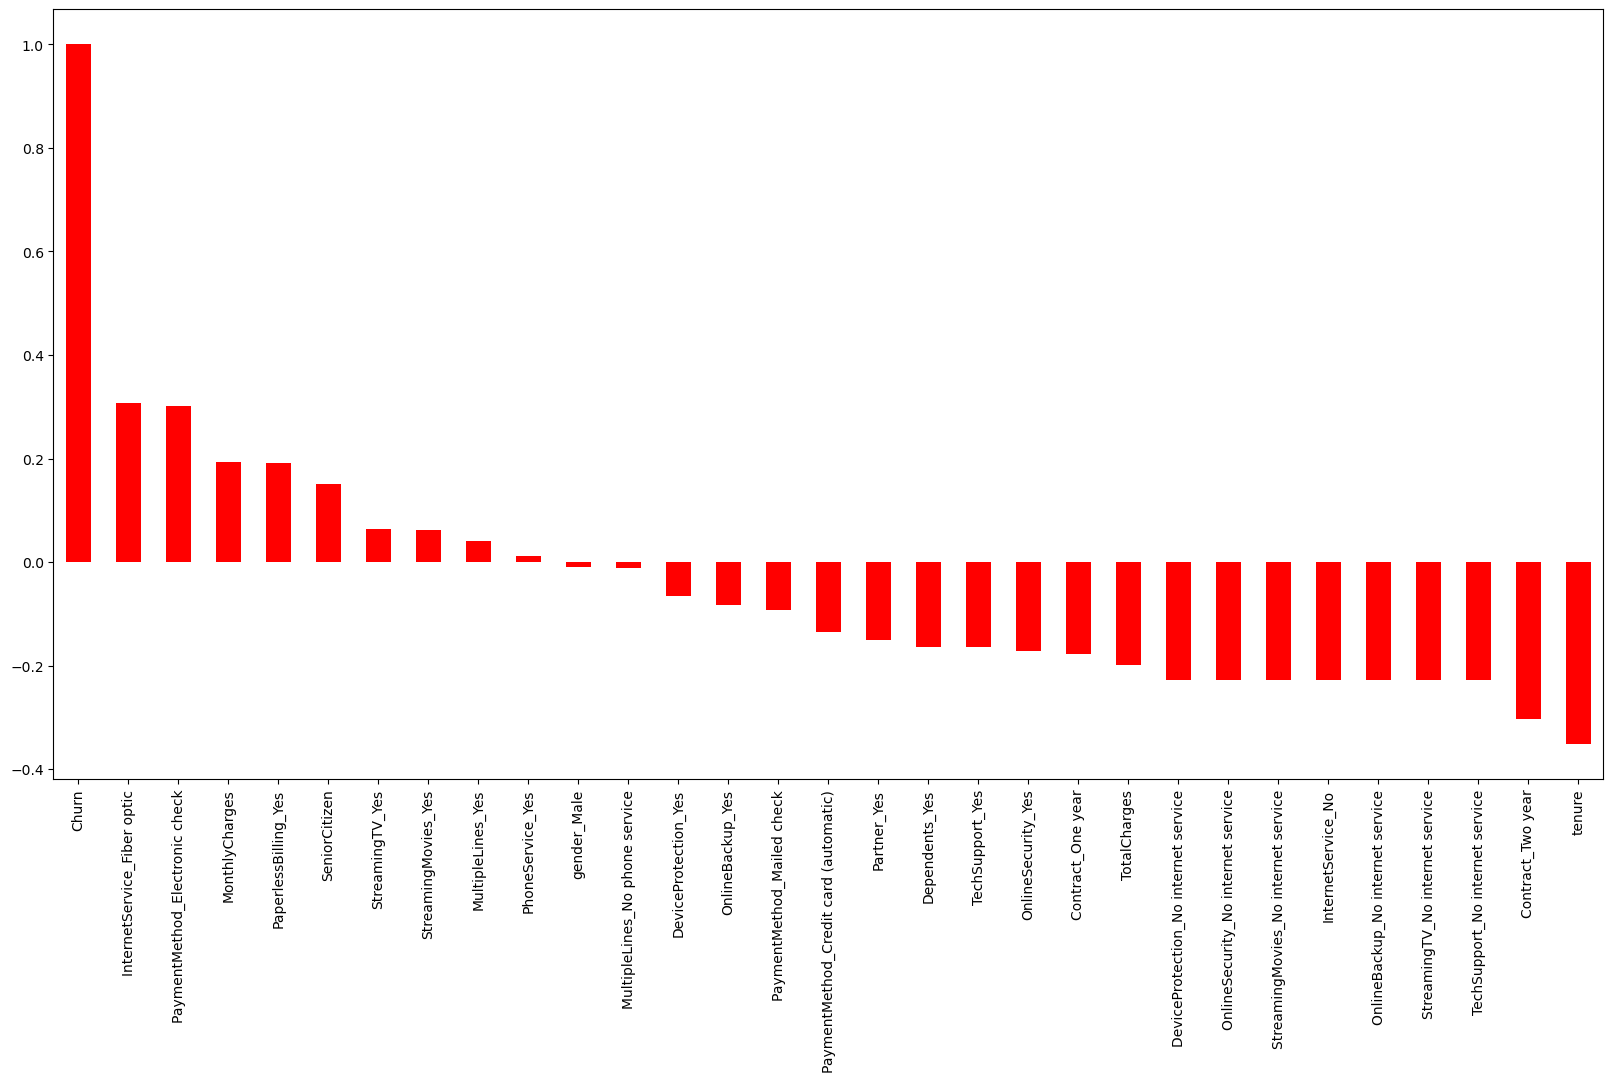

In [72]:
plt.figure(figsize=(20,10))
df_final.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color="red")

In [73]:
positiv_corrs = df_final.corr()['Churn'][df_final.corr()['Churn'] > 0]

# Plotting a heatmap to show all the varibles having a positive correlation

<Axes: >

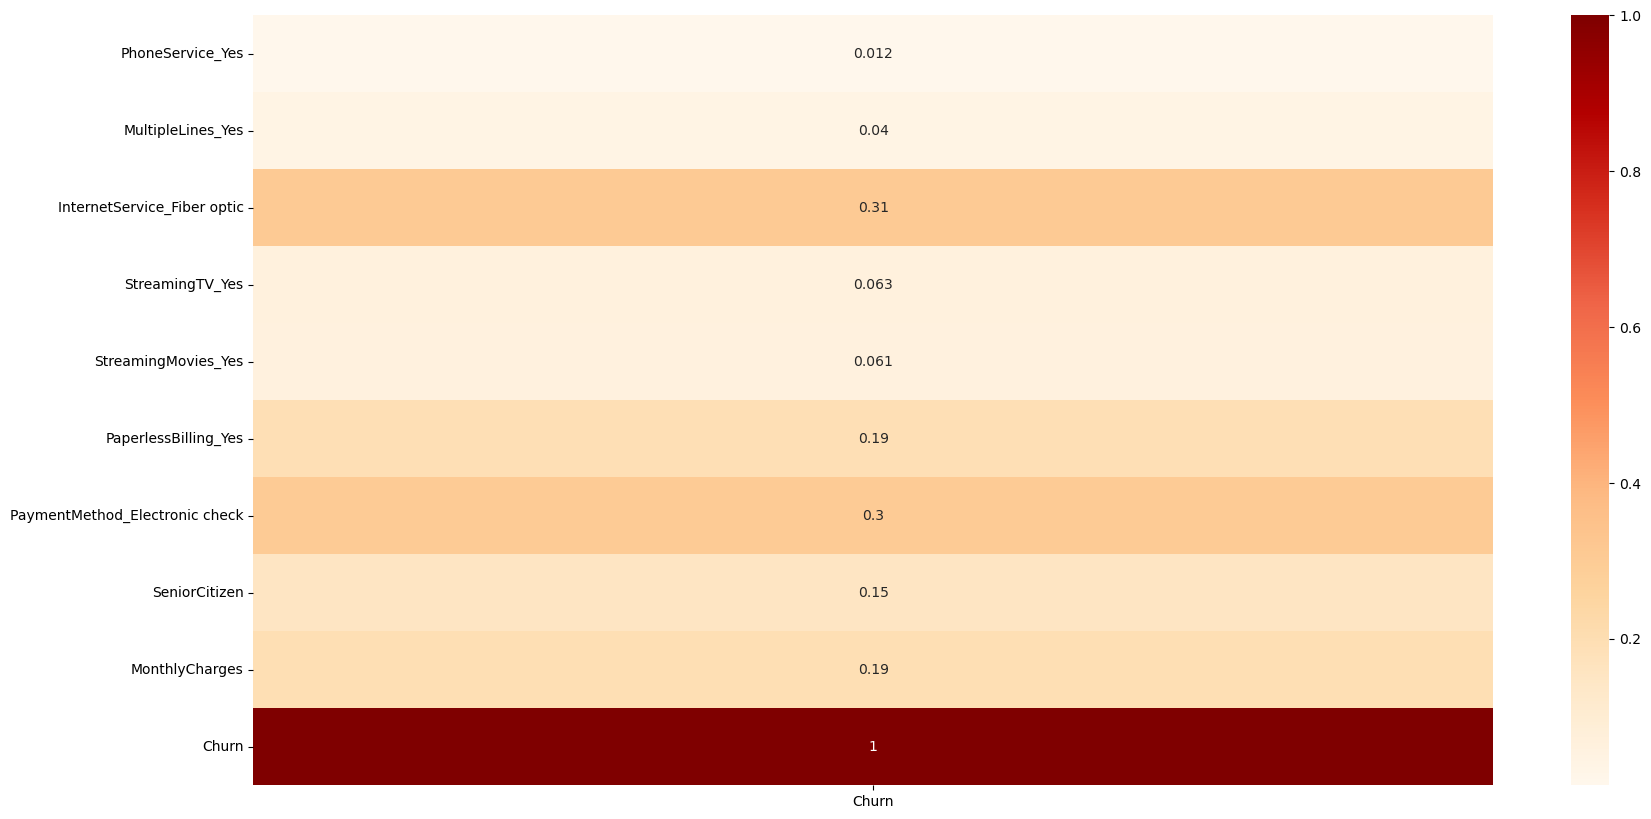

In [74]:
plt.figure(figsize = (20,10))
sns.heatmap(data=pd.DataFrame(positiv_corrs), annot=True,cmap = 'OrRd')

In [75]:
negative_corrs = df_final.corr()['Churn'][df_final.corr()['Churn'] < 0]

# Plotting a heatmap to show all the varibles having a negative correlation

<Axes: >

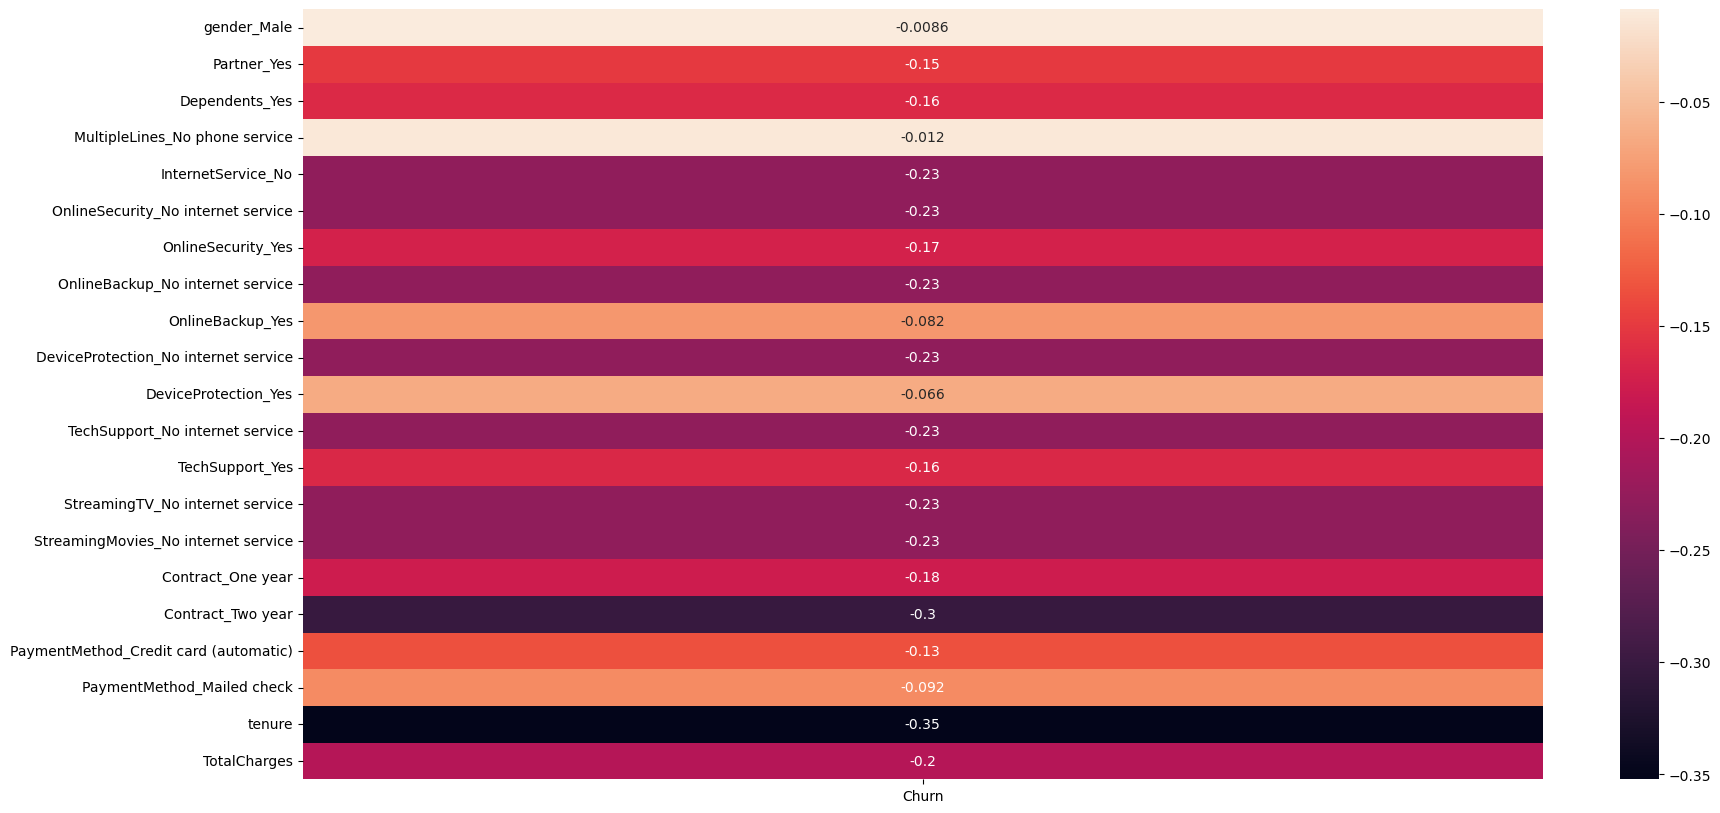

In [76]:
plt.figure(figsize = (20,10))
sns.heatmap(data=pd.DataFrame(negative_corrs), annot=True)

# EDA Done!!!!
![](https://media.tenor.com/Gyss7QHUmqAAAAAC/stallone-sylvester-rocky-balboa.gif)

# Coming to the Modelling
![](https://i.makeagif.com/media/3-13-2018/aD6zTx.gif)

# Importing Libraries

In [77]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [78]:
le = preprocessing.LabelEncoder()

# Making a list of all the categorical colums to convert it into labels

In [79]:
col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [80]:
for i in col:
    df[i] = le.fit_transform(df[i])

# Dropping the useless CustomerID column

In [81]:
df = df.drop('customerID', axis = 1)

# Splitting the Data

In [82]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.30)

In [84]:
X

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              2           29.85         29.85  
1                    0              3           56.95       1889.50  
2                    1              3           53.85        108.15  
3                    0              0           42.30       1840.75  
4                    1              2           70.70        151.65  
...                ...            ...             ...           ...  
7038                 1              3           84.80       1990.50  
7039                 1              1          103.20       7362.90  
7040                 1              2           29.60        346.45  
7041                 1              3           74.40        306.60  
7042                 1              0          105.65       6844.50  

[7043 rows x 19 columns]

In [85]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Coming to the Decision tree with our Training and Testing data
- I have kept the max depth as 5 to increase the accuracy of out model keeping it high will help the model to predict more accurately
- But this will also increase the number of branches which will split the data further and make the plot unreadable

In [86]:
clf = DecisionTreeClassifier(min_samples_split=400, max_depth=5)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=5, min_samples_split=400)

In [87]:
from sklearn import tree

### To reduce the number of branches and make it visible we can reduce the Max Depth
### I haven't done it because if i did so, the accuracy of my model decreased stupendously 

[Text(0.56, 0.9166666666666666, 'x[14] <= 0.5\ngini = 0.387\nsamples = 4930\nvalue = [3635, 1295]'),
 Text(0.3, 0.75, 'x[8] <= 0.5\ngini = 0.488\nsamples = 2690\nvalue = [1553, 1137]'),
 Text(0.16, 0.5833333333333334, 'x[4] <= 10.5\ngini = 0.5\nsamples = 1811\nvalue = [888, 923]'),
 Text(0.08, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.465\nsamples = 885\nvalue = [325, 560]'),
 Text(0.04, 0.25, 'gini = 0.5\nsamples = 353\nvalue = [181, 172]'),
 Text(0.12, 0.25, 'x[18] <= 120.0\ngini = 0.395\nsamples = 532\nvalue = [144, 388]'),
 Text(0.08, 0.08333333333333333, 'gini = 0.251\nsamples = 156\nvalue = [23, 133]'),
 Text(0.16, 0.08333333333333333, 'gini = 0.436\nsamples = 376\nvalue = [121, 255]'),
 Text(0.24, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.477\nsamples = 926\nvalue = [563, 363]'),
 Text(0.2, 0.25, 'gini = 0.326\nsamples = 234\nvalue = [186, 48]'),
 Text(0.28, 0.25, 'x[4] <= 54.5\ngini = 0.496\nsamples = 692\nvalue = [377, 315]'),
 Text(0.24, 0.08333333333333333, 'gini = 0.499\n

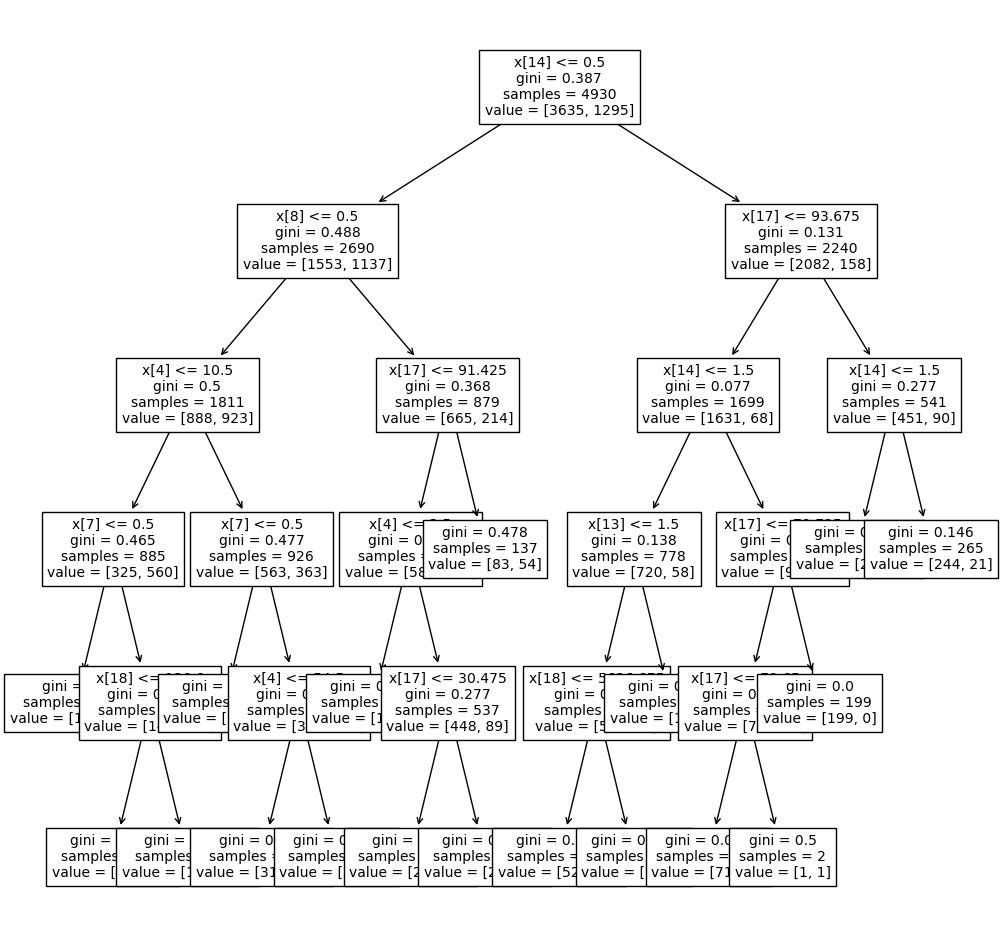

In [108]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)

# Checking the Train accracy of our model to compare it with the Test accuracy to see how well is our model predicts

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
clf.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
y_pred_train_clf = clf.predict(X_train)

In [92]:
acc = accuracy_score(y_train,y_pred_train_clf)

In [93]:
acc

0.786815415821501

# 78% Accuracy!!!

# Plotting a Confusion Matrix

In [94]:
cm = confusion_matrix(y_train,y_pred_train_clf)

Text(0.5, 1.0, 'Prediction')

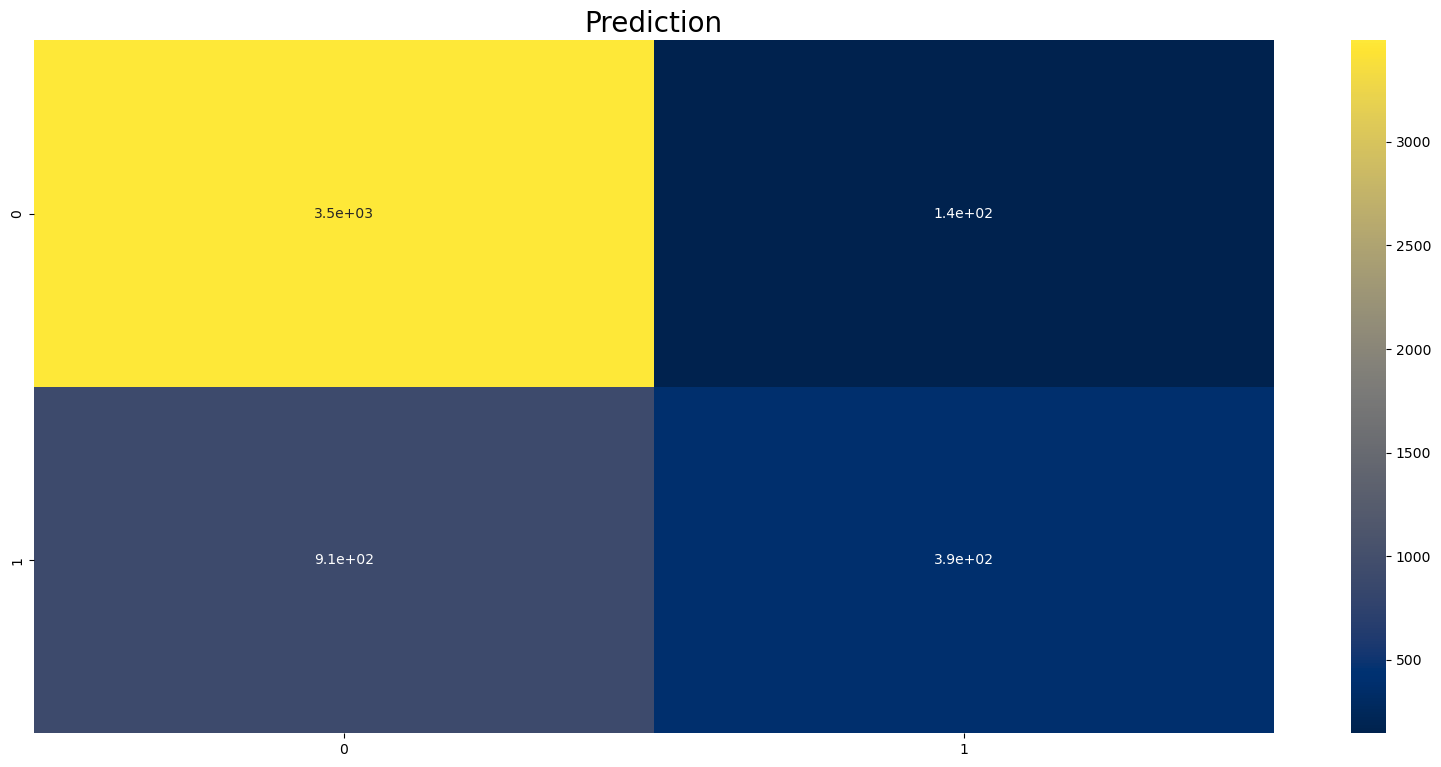

In [95]:
plt.figure(figsize = (20,9))
sns.heatmap(cm, annot=True, cmap="cividis")
plt.title('Prediction', fontsize=20)

# Checking our model accuracy on the Testing data to see if our model is reliable or not

In [96]:
y_pred_test_clf = clf.predict(X_test)

In [97]:
acc = accuracy_score(y_test,y_pred_test_clf)

![](https://media.tenor.com/HWU9s_mEieEAAAAM/bh187-spongebob.gif)

In [98]:
acc

0.7808802650260294

# 78% Here also

# Plotting a Confusion Matrix for the Testing Predictions

In [99]:
cm1 = confusion_matrix(y_test,y_pred_test_clf)

Text(0.5, 1.0, 'Prediction')

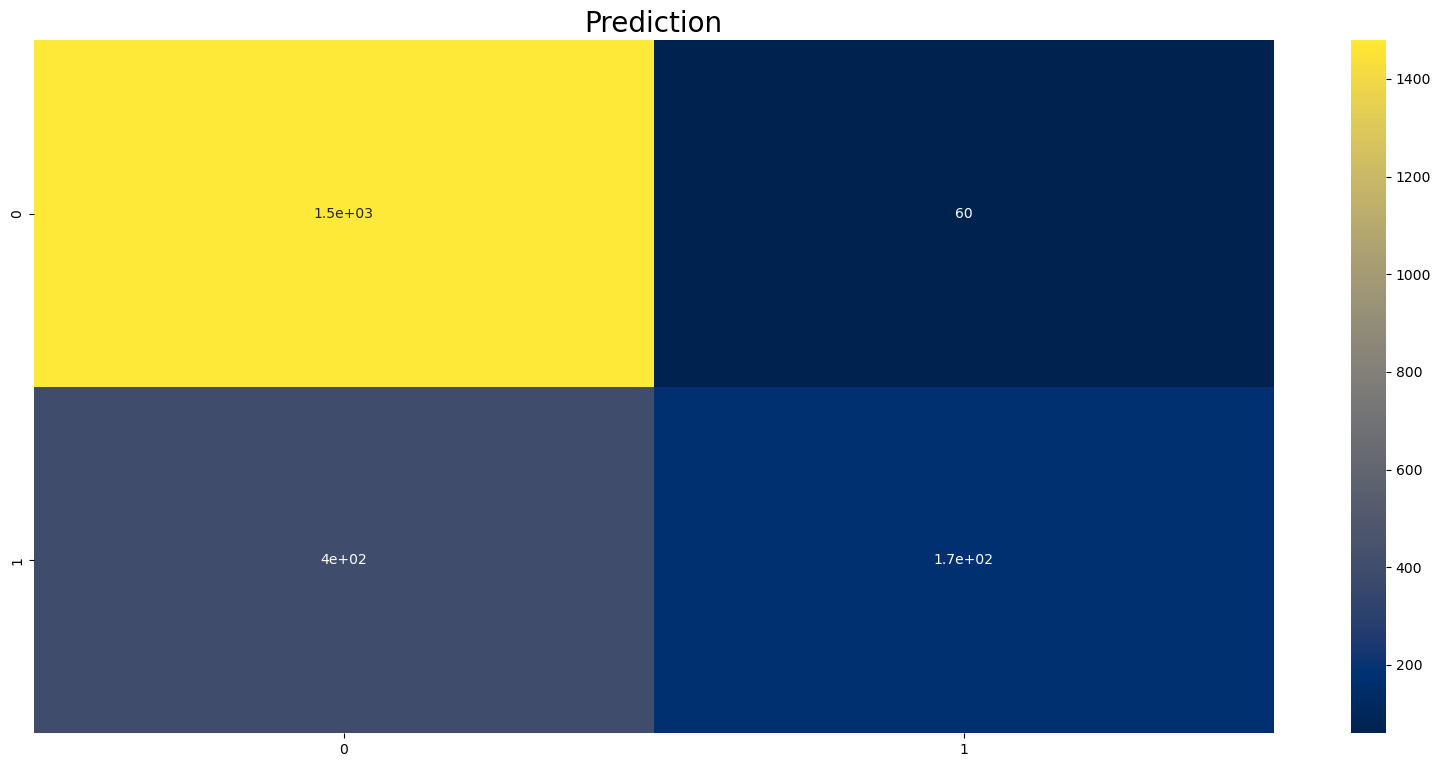

In [100]:
plt.figure(figsize = (20,9))
sns.heatmap(cm1, annot=True, cmap="cividis")
plt.title('Prediction', fontsize=20)

# Wrapping all of it in a function

In [101]:
def functionx(b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t):
    temp=[]
    pred=(clf.predict([[b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]]))
    z = le.inverse_transform(pred)
    return pred

# To Check that our model is predicting the churn successfully 
## I took 2 samples, One where the Churn was Yes and one where the Churn was No
## The below is the sample where the Churn was No

In [102]:
functionx(1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85)

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0], dtype=int64)

![](https://media.tenor.com/taqSRWFOkaQAAAAC/kung-fu-panda.gif)

### Our model predicted 0 which means No, our model works suberb....

### The below sample is the sample where the Churn was Yes

In [103]:
functionx(0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65)

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1], dtype=int64)

### As expected in this case it predicted 1 which means Yes, which means its predicting is awfully good

### I have given both the X and the actual data for you to confirm that the sample data i took from these Dataframe works just fine.

In [104]:
X.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
1                 0              3           56.95       1889.50  
2                 1              3           53.85        108.15

In [105]:
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1

# The End.......I can finally rest and watch the sunrise of a grateful universe
![](https://media.tenor.com/xHY18avbYVcAAAAC/smiling-mcu.gif)